<a href="https://colab.research.google.com/github/ethandsz/MLProject/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **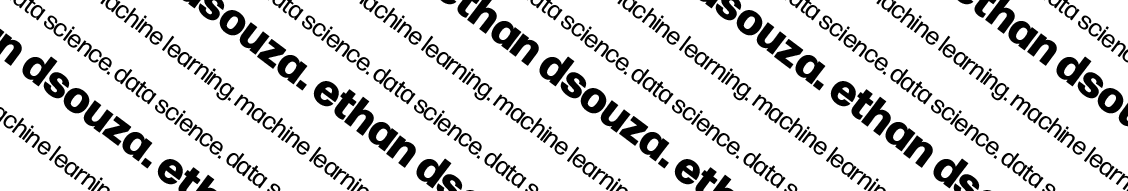News Headline Category Prediction**

https://colab.research.google.com/drive/1VHPL41d-OBs939nuenhDhww8cExMxpDK?usp=sharing


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Importing data, exploratory analysis, and setting target column(s) for training

In [ ]:
#raw = pd.read_excel('drive/MyDrive/Headline/Headlines.xlsx') 
raw = pd.read_excel('Downloads/Headlines.xlsx')

In [ ]:
#raw = raw.sample(50000)

In [ ]:
raw

,Unnamed: 0,category,headline,authors,link,short_description,date
0,0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...,...
200848,200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


Dropping "Unnamed: 0" as it has no useful data

In [ ]:
raw.drop(columns="Unnamed: 0", inplace= True) 

Checking the number of categories and their names

In [ ]:
len(list(raw.category.unique()))

41

In [ ]:
raw.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [ ]:
raw.describe()

C:\Users\Ethan\AppData\Local\Temp\ipykernel_2448\79165625.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw.describe()


,category,headline,authors,link,short_description,date
count,200853,200847,164233,200853,181121,200853
unique,41,199343,27992,200812,178332,2309
top,POLITICS,Sunday Roundup,Lee Moran,https://www.huffingtonpost.comhttp://stylelike...,Welcome to the HuffPost Rise Morning Newsbrief...,2013-04-24 00:00:00
freq,32739,90,2423,2,192,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


In [ ]:
raw.authors.unique().size

27993

In [ ]:
raw.authors.isna().sum()

36620

Dropping null/NaN values in the specified columns

In [ ]:
raw.dropna(subset = ['short_description', 'headline'], inplace = True) #Dropping all rows which contain Null/NaN values in the specified columns

Plot of the top 25 reported categories

In [ ]:
plt.figure(figsize=(60,24));

fig = px.bar(x = raw.category.value_counts().index[:25], y = raw.category.value_counts()[:25], labels = {
    "x": "Categories", #Setting x label to categories
    "y": "Count"}, #Setting y label to count
    title = "Top 25 categories"); #Setting the title
fig.show(renderer="colab");

<Figure size 4320x1728 with 0 Axes>

In [ ]:
raw['date'] = pd.to_datetime(raw['date'])

In [ ]:
raw['year'] = raw['date'].dt.year

In [ ]:
plt.figure(figsize=(32,24));

fig = px.bar(x = raw.year.value_counts().index, y = raw.year.value_counts(), labels = {
    "x": "Year", #Setting x label to categories
    "y": "Count"}, #Setting y label to count
    title = "*Year of publication*"); #Setting the title
fig.show(renderer="colab");

<Figure size 2304x1728 with 0 Axes>

# Combining Similar Categories

In [ ]:
raw.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [ ]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
raw.loc[raw['category'] == 'FIFTY'].sample(5)

,category,headline,authors,link,short_description,date,year
123290,FIFTY,Why I Didn't Feel Like A 'Real' Mother Until My Kids Hit Middle School,"Donna Highfill, ContributorWriter, Coach, Humorist, and Change Consultant",https://www.huffingtonpost.com/entry/different-kinds-of-mothers_b_5269266.html,"Disclaimer: I think my children are the greatest two contributions I will ever make to this crazy world. But motherhood has not always been apple pie for me, because as a mother I felt responsible for making the pie, and I'm one of those women who would rather face a criminal on the streets than a stove ripe for action.",2014-05-08,2014
93543,FIFTY,How Constant Praise May Be Damaging Our Grandchildren,"Donne Davis, ContributorAuthor, ""When Being a Grandma Isn't So Grand""",https://www.huffingtonpost.com/entry/how-constant-praise-may-be-damaging-our-grandchildren_b_7021158.html,"Over the past three generations, theories about self-esteem have dramatically changed. Now the pendulum has swung in the opposite direction and it turns out my grandparents may have been on to something. There is mounting evidence that constant praise may be damaging our grandchildren.",2015-04-15,2015
100357,FIFTY,The Verdict Is In: Obamacare Is Working Exactly As The Law Intended,"Buck Wargo, ContributorBuck Wargo, Sr. Editor | NowItCounts.com",https://www.huffingtonpost.com/entry/the-verdict-is-in-obamaca_b_6533878.html,"Prior to the enactment of the Affordable Care Act, those 50 and older, if they could get coverage, faced premiums several times higher than those who are younger and in better health. That same group is also now eligible for subsides that help lower the cost to make it even more affordable.",2015-01-26,2015
114367,FIFTY,A Freeway Detour,"Rob Hiaasen, ContributorColumnist, Editor",https://www.huffingtonpost.com/entry/a-freeway-detour_b_5682467.html,"I stopped, pulled over and walked back to the dog. He was still standing guard on the bridge. As I approached, he began barking, then jumped down behind the bridge and started to run. I turned my back and sat on the bridge to see if the dog would settle down. I was in no hurry.",2014-08-18,2014
91899,FIFTY,Dear Human: A Desperate Plea From Your Dog,"Janet Eve Josselyn, ContributorArchitect, attorney, badass mother writer and the author of an...",https://www.huffingtonpost.com/entry/desperate-plea-from-dog_b_7143016.html,We are in danger. We need to get out of this house and away from the cat. He is a psychopath. Did you see what he did to that mouse? Torture and dismemberment are activities associated with antisocial personality disorders. And he exhibits no remorse or guilt. He's not right in the head.,2015-05-04,2015


In [ ]:
raw.loc[raw['category'] == 'GREEN'].sample(5)

,category,headline,authors,link,short_description,date,year
92432,GREEN,A Call to Action on Climate for All Candidates for President of the United States,"Rhea Suh and Gene Karpinski, Contributors",https://www.huffingtonpost.com/entry/a-call-to-action-on-clima_b_7154944.html,"Through rising seas, withering drought, catastrophic storms and other hallmarks of climate change, our world is telling us every way it knows how that it's time to cut the dangerous carbon pollution that's driving the climate crisis. Long before history judges our response, voters will decide which candidate best understands the threat we face.",2015-04-28,2015
54595,GREEN,Here's Proof We Can Solve Global Environmental Problems If We Try,Ryan Grenoble,https://www.huffingtonpost.com/entry/ozone-hole-shrinks-montreal-treaty_us_577684c8e4b04164640f9cd8,"""We can now be confident that the things weâ€™ve done have put the planet on a path to heal,"" one scientist says.",2016-07-01,2016
21214,GREEN,Global Series: Humans In Our Habitat,"The Conversation Global, ContributorThe Conversation is a collaboration between editors and academ...",https://www.huffingtonpost.com/entry/global-series-humans-in-our-habitat_us_596e2ed8e4b0376db8b65b32,"On the Tibetan plateau, the village of Yunta is showing that animals and humans can live peacefully together and care for",2017-07-18,2017
99351,GREEN,4 Climate-Friendly Valentine's Day Gifts,"Lori Popkewitz Alper, ContributorFounder, Editor-In-Chief, Groovy Green Livin",https://www.huffingtonpost.com/entry/4-climatefriendly-valenti_b_6622590.html,"While discussions of political solutions to climate change are beginning to circulate, we can continue with our own personal efforts to reduce our individual carbon footprints. This Valentine's Day, rather than focusing on those red and chocolate filled aisles, why not look outside the box and give a gift that will truly make a difference.",2015-02-07,2015
45929,GREEN,Colorful Coral Pulses With Life In This Stunning Time-Lapse Video,David Freeman,https://www.huffingtonpost.com/entry/colorful-coral-video_us_57f694efe4b00885f2c67a14,Beautiful!,2016-10-07,2016


In [ ]:
raw.loc[raw['category'] == 'QUEER VOICES'].sample(5)

,category,headline,authors,link,short_description,date,year
5498,QUEER VOICES,'RuPaul's Drag Race' Season 10 Premiere Date Announced,James Michael Nichols,https://www.huffingtonpost.com/entry/rupauls-drag-race-season-10_us_5a86fd19e4b00bc49f437939,"Are you ready for two hours of ""Drag Race"" every single week?",2018-02-16,2018
37821,QUEER VOICES,What's It Like To Be Bisexual? The Tough Questions,"Justin T Weller, ContributorCo-Founder of TrueChat.org, media personality, LGBT+ activist,...",https://www.huffingtonpost.com/entry/whats-it-like-to-be-bisexual-the-tough-questions_us_587186c3e4b08052400ee33c,We must step out of the closet every day.,2017-01-08,2017
25413,QUEER VOICES,Russian Retail Store Displays Sign Reading 'No Entry For Faggots',NaN,https://www.huffingtonpost.com/entry/russian-retail-chain-gays_us_592ba40ce4b053f2d2ad4984,"""Our planet is full of filth and sick humans,"" the owner said.",2017-05-29,2017
136449,QUEER VOICES,Queer New World: Meet Brooklyn's Babes Trust,James Michael Nichols,https://www.huffingtonpost.com/entry/babes-trust-brooklyn-drag_us_5bafbf5de4b0ad76926146a8,I'll also be doing a New Years Eve Dance & Drag Party at Secret Project Robot! with my sisters Macy Rodman and SCHWARZ. Any,2013-12-15,2013
142460,QUEER VOICES,"Allison Moon Talks Girl Sex 101, New Book For Queer Woman",James Michael Nichols,https://www.huffingtonpost.com/entry/girl-sex-101_us_5bafbbeae4b0ad76926108b6,You describe Girl Sex 101 as a â€œroad trip in a book unlike any other.â€ What do you mean by that? Iâ€™m kind of jokingly calling,2013-10-13,2013


In [ ]:
raw.loc[raw['category'] == 'IMPACT'].sample(5)

,category,headline,authors,link,short_description,date,year
122088,IMPACT,Albert Pujols and the End to Down Syndrome Bullying,"Kai Sato, ContributorFounding Partner, Vintage Capital Investments",https://www.huffingtonpost.com/entry/albert-pujols-the-end-to-_b_5380308.html,"This one presented a unique opportunity for all of us to contribute, without ever having to spend a nickel: We can help protect people with Down syndrome from being bullied.",2014-05-23,2014
109463,IMPACT,Promoting Malala's Vision for Youth Through Global Dignity Day,"Giovanna Mingarelli, ContributorTechnology Entrepreneur, Public Speaker and Writer",https://www.huffingtonpost.com/entry/promoting-malalas-vision-for-youth-through-global-dignity-day_b_5980280.html,"Given the widespread use of social media and text messaging, one of the most common themes being discussed is bullying, where at least half of teens worldwide have been bullied online in the last few years.",2014-10-14,2014
118520,IMPACT,Reflecting on 50 Years of the Civil Rights Act of 1964,"Kiran Ahuja, ContributorFormer Executive Director of the White House Initiative on Asi...",https://www.huffingtonpost.com/entry/reflecting-on-50-years-of_b_5553462.html,"Today, July 2, 2014, marks the 50th anniversary of the Civil Rights Act of 1964, the landmark legislation signed by President Lyndon B. Johnson outlawing discrimination based on race, color, religion, sex, or national origin.",2014-07-03,2014
90853,IMPACT,Lessons From a Great Community Organizer,"Pablo Eisenberg, ContributorSenior Fellow, Georgetown Public Policy Institute",https://www.huffingtonpost.com/entry/lessons-from-a-great-comm_b_7297456.html,"The death last month of Edward Chambers, one of the world's great community organizers, serves as a strong reminder of how the power of the grass-roots can be mobilized to make a huge difference in the lives of the neediest. He was a master of building groups that could last for the long haul, a skill not enough activists possess.",2015-05-16,2015
144464,IMPACT,Keeping Promises to Women and Children: PMNCH 2013 Report on Global Strategy Commitments,"Carole Presern, Contributor\nExecutive Director, The Partnership for Maternal, Newborn and ...",https://www.huffingtonpost.com/entry/pmnch-2013-report_us_5bb1b41fe4b01857b70a6372,"A new report gives us hope. More organizations, governments and the private sector are making commitments to improve women's and children's health every year, and those commitments are being followed up with real action.",2013-09-22,2013


In [ ]:
raw.loc[raw['category'] == 'WELLNESS'].sample(5)

,category,headline,authors,link,short_description,date,year
125321,WELLNESS,"What Dreams May Come, or Feelin' Drowsy","Judith Greenberg, Ph.D., Contributor\nGallatin School of Individualized Study at NYU",https://www.huffingtonpost.com/entry/what-dreams-may-come-or-feelin-drowsy_us_5b9dfab4e4b03a1dcc8fcef6,"This winter, I developed an odd napping habit. As I described to my doctor, this new habit is different from my lifelong affection for the pleasures of plush pillows, soft blankets and high thread-count Egyptian cotton sheets (preferably Italian, if we're sharing pillow talk).",2014-04-14,2014
186792,WELLNESS,Engage With Empathy,"Barbara Ficarra, RN, BSN, MPA, Contributor\nJournalist; Founder, BarbaraFicarra.com; Media broadcaster; He...",https://www.huffingtonpost.com/entry/health-care-empathy_us_5b9bea1ce4b03a1dcc7b1945,"To effectively engage patients and caregivers, it is critical that health care providers engage with empathy. With empathy we connect, we understand, we listen, and we communicate. We can engage and empower our patients to be proactive and in charge of their health.",2012-06-27,2012
145898,WELLNESS,Letting Go and Moving On,"Monica Miranda, Contributor\nOwner, Arbol Toys",https://www.huffingtonpost.com/entry/letting-go_us_5b9d7d29e4b03a1dcc88a097,"It is human nature to gravitate towards what you know is safe. Hence, we blindly go through the motions of our daily routines, oblivious to the fact that our world is constantly moving and changing all around us.",2013-09-06,2013
195313,WELLNESS,"If Your Spouse Snores, Will You Gain Weight?","Judith J. Wurtman, PhD., Contributor\nCo-Author, 'The Serotonin Power Diet'",https://www.huffingtonpost.com/entry/sleep-weight-loss_us_5b9b7f4fe4b03a1dcc781516,"Although snoring spouses have not made it onto the list of common causes of weight gain, sleeplessness, whether caused by a noisy bed partner, 3 a.m. anxiety, jet lag or shift work, may have a disastrous effect on eating.",2012-03-28,2012
191787,WELLNESS,"Que Sera, Siri?","Benedetta Pignatelli, Contributor\nNeapolitan freelance photojournalist",https://www.huffingtonpost.com/entry/que-sera-siri_us_5b9ba5f3e4b03a1dcc7949d6,"How far is distant gratification? Get me to its nearest exit, Siri, and let it be your parting gift. The quest for instant",2012-05-04,2012


In [ ]:
raw.loc[raw['category'] == 'FOOD & DRINK'].sample(5)

,category,headline,authors,link,short_description,date,year
156501,FOOD & DRINK,Instant Japanese Candy GIF Is Totally Freaking Us Out (VIDEO),Rebecca Orchant,https://www.huffingtonpost.com/entry/instant-japanese-candy-gif-video_us_5b9d2a6de4b03a1dcc8512f7,What is this candy sorcery??,2013-05-17,2013
156486,FOOD & DRINK,Accidental Locavore: DIY Butter Recipe,"Anne Maxfield, Contributor\nFounder",https://www.huffingtonpost.com/entry/accidental-locavore-diy-butter_us_5b9d2bd6e4b03a1dcc852092,Making butter is pretty easy. You just abuse heavy cream long enough and it starts to separate into butter and buttermilk.,2013-05-17,2013
140945,FOOD & DRINK,Outrageous Nachos,"Food & Wine, Contributor\nfoodandwine.com",https://www.huffingtonpost.com/entry/outrageous-nachos_us_5b9da101e4b03a1dcc8a77e9,The nation's most innovative nachos.,2013-10-29,2013
163887,FOOD & DRINK,HuffPost Tastemakers: 250 Slices Of Crack Pie,NaN,https://www.huffingtonpost.com/entry/crack-pie-momofuku_us_5b9cdfc4e4b03a1dcc829a3a,It's a beautiful sight.,2013-02-28,2013
170411,FOOD & DRINK,Food Geek Wish List,"So Good, Contributor\nAn absurd look at the world of food",https://www.huffingtonpost.com/entry/food-geek-wish-list_us_5b9ca908e4b03a1dcc80a44c,"For the nerdy foodie in your life, you can't go wrong with these 11 food geek gifts.",2012-12-21,2012


In [ ]:
raw.loc[raw['category'] == 'BUSINESS'].sample(5)

,category,headline,authors,link,short_description,date,year
119972,BUSINESS,Bring Your Brain to Work,"Edward Muzio, ContributorCEO, Group Harmonics",https://www.huffingtonpost.com/entry/bring-your-brain-to-work_b_5499772.html,"My wife, my infant son, and I arrived at the boarding door, baby in arm and bags in hand. That's when we found ourselves caught in an example of one of the biggest workplace problems of our time.",2014-06-16,2014
67077,BUSINESS,Exclusive: Accenture Is the First Big Consulting Firm To Publish Race And Gender Stats,NaN,https://www.huffingtonpost.comhttp://fortune.com/2016/02/08/exclusive-accenture-is-the-first-big-consulting-firm-to-publish-race-and-gender-stats,"For the first time, Accenture on Monday released a detailed breakdown of the gender and ethnicity of its U.S. workforce.",2016-02-09,2016
120715,BUSINESS,New Jersey's Consumer Advocate Takes the Verizon-NJ Board of Public Utilities' 'Stipulation Agreement' to Court,"Bruce Kushnick, ContributorExecutive Director, New Networks Institute",https://www.huffingtonpost.com/entry/-new-jerseys-consumer-adv_b_5470299.html,"On May 27, 2014, the New Jersey Division of Rate Counsel filed with the Superior Court, Appellate Division, a Notice of Appeal to halt a stipulation agreement between the New Jersey Board of Public Utilities (NJBPU) and Verizon New Jersey (VNJ) to erase a 20+ year plan called Opportunity New Jersey.",2014-06-08,2014
79407,BUSINESS,Unlikely Coalition Forms To Back Renewable Energy,Jenny Che,https://www.huffingtonpost.com/entry/re100-fortune-500-renewable-energy_us_5602b7c7e4b0fde8b0d08e9a,"Starbucks, Walmart and others are setting tough new goals for themselves.",2015-09-23,2015
88067,BUSINESS,"In the Face of Fear, Organizational Leaders Need to Create Armies of Yes Men (and Women)!","Jayson Boyers, ContributorPresident & CEO, Cleary University",https://www.huffingtonpost.com/entry/in-the-face-of-fear-organizational-leaders-need-to-create-armies-of-yes-men-and-women_b_7599514.html,"The message that employees should hear and pass along is ""yes."" Yes, we want to hear from you. Yes, your opinion matters. Yes, you are valued. This message should be repeated throughout the organization, not only to employees, but customers as well.",2015-06-17,2015


In [ ]:
raw.loc[raw['category'] == 'MONEY'].sample(5)

,category,headline,authors,link,short_description,date,year
126001,MONEY,What Wikipedia Won't Tell You About Personal Savings,"Jim Gibson, Contributor\nPersonal Finance writer, Your Finances Simplified",https://www.huffingtonpost.com/entry/what-wikipedia-wont-tell_us_5b9df6d7e4b03a1dcc8fa112,The real power is in your hands. Now its up to you to step up to the plate and do something about your personal savings.,2014-04-07,2014
185661,MONEY,"IRS Employee Overstated $95,000 In Deductions",NaN,https://www.huffingtonpost.comhttp://blogs.wsj.com/totalreturn/2012/07/10/irs-employee-overstated-95000-in-deductions/,Think you have tax troubles? Jacynthia Quinn probably has more. A U.S. Tax Court judge recently slapped her with a civil,2012-07-10,2012
193869,MONEY,Your Phone Can Do Your Taxes,"DailyWorth, Contributor\nA community of women who talk money",https://www.huffingtonpost.com/entry/paying-taxes-mobile_us_5b9b9098e4b03a1dcc78a4b7,"If you still haven't done your taxes -- even with the extended April 17 deadline, even though your taxes are pretty simple (no kids, no real estate, no investment income) -- it's time to go mobile.",2012-04-12,2012
195230,MONEY,"NerdWallet: Free Checking Account Finder Locates No Fee Services, High Interest Accounts",Catherine New,https://www.huffingtonpost.com/entry/nerdwallet-checking-account-tool_us_5b9b8181e4b03a1dcc782408,"""By answering up to 10 simple questions, NerdWallet identifies the checking account with the lowest fees by matching your",2012-03-28,2012
181245,MONEY,Postal Service Financial Problems: 10 Things They Don't Want You To Know,"SmartMoney, SmartMoney",https://www.huffingtonpost.com/entry/postal-service-financial-problems_us_5b9c30e9e4b03a1dcc7cf81c,"To continue reading, click here. 4. We're hiring our competitors to do our jobs for us. 2. Our retirees are just fine, thanks",2012-08-27,2012


In [ ]:
raw.loc[raw['category'] == 'PARENTS'].sample(5)

,category,headline,authors,link,short_description,date,year
21335,PARENTS,Hilary Duff Shared This Moving Poem That's Resonating With Parents,Taylor Pittman,https://www.huffingtonpost.com/entry/hilary-duff-shared-this-moving-poem-thats-resonating-with-parents_us_596ccea4e4b03389bb192c42,"Poet Rachel Zucker's take on parenting struck a chord with the ""Younger"" star.",2017-07-17,2017
72003,PARENTS,This Elf On The Shelf Brightens Kids' Days In The Hospital,Taylor Pittman,https://www.huffingtonpost.com/entry/this-elf-on-the-shelf-brightens-kids-days-in-the-hospital_us_56705802e4b0e292150f686c,Milania is making the holidays a little brighter for young patients.,2015-12-15,2015
10202,PARENTS,"Prince George Had The Tiniest, Cutest Part In His School's Nativity Play",Carly Ledbetter,https://www.huffingtonpost.com/entry/prince-george-school-nativity_us_5a2825c8e4b02d3bfc379051,Hopefully Meghan Markle shared some acting tips.,2017-12-06,2017
20655,PARENTS,You'll Cry-Laugh At This Mom's Post About Her Kid Catching Her Having Sex,Taylor Pittman,https://www.huffingtonpost.com/entry/youll-cry-laugh-at-this-moms-post-about-her-kid-catching-her-having-sex_us_59775fe6e4b0c95f375ed963,She wrote it like a (parenting) horror story.,2017-07-25,2017
33028,PARENTS,Dad Makes Invisible Jet Out Of Balloons For Daughter's Wonder Woman Costume,Taylor Pittman,https://www.huffingtonpost.com/entry/dad-makes-invisible-jet-out-of-balloons-for-daughters-wonder-woman-costume_us_58b5b4afe4b060480e0c4111,It required about 275 balloons.,2017-03-01,2017


In [ ]:
raw.loc[raw['category'] == 'PARENTING'].sample(5)

,category,headline,authors,link,short_description,date,year
190297,PARENTING,"Celebrities Who Breastfeed: Alanis Morissette, Mayim Bialik, Beyonce And More",NaN,https://www.huffingtonpost.com/entry/celebrities-who-breastfeed_us_5b9bbd3de4b03a1dcc79f93c,"After a certain national magazine rocked the world with a cover story about attachment parenting, singer Alanis Morissette",2012-05-21,2012
141378,PARENTING,"Davion's Plea for a Family (and the 101,000 He Represents)","Kristen Howerton, Contributor\nBlogger, Rage Against the Minivan",https://www.huffingtonpost.com/entry/davions-plea-for-a-family-and-the-101000-he-represents_us_5b9d9e58e4b03a1dcc8a5323,Maybe Davion's plea will create a bigger change than he ever imagined. Maybe it will prompt our nation to listen to the voices of foster youth who are asking for a family before it's too late.,2013-10-24,2013
182109,PARENTING,Swimming Lessons,"Judy Bolton-Fasman, Contributor\nWriter",https://www.huffingtonpost.com/entry/swimming-lessons_us_5b9c24e2e4b03a1dcc7c9c19,"In the old-fashion parlance of the Talmud, a father is required to teach his son three things: The Torah, a trade and how to swim.",2012-08-17,2012
156411,PARENTING,Beating the Odds of Divorce When Your Child Has Special Needs,"Anat Baniel, Contributor\nAnat Baniel, Founder of the Anat Baniel MethodÂ® and NeuroMovem...",https://www.huffingtonpost.com/entry/beating-the-odds-of-divorce_us_5b9d2c27e4b03a1dcc8524b4,"It's often said that parents of children with special needs divorce at a higher rate than the general population. So, I asked John Gray: What do you think are the causes and what suggestions can you give to these parents?",2013-05-17,2013
190119,PARENTING,Rite of Passage,"Tom W. Watson, Contributor\nBusinessman, Entrepreneur, Author, ""Man Shoes""",https://www.huffingtonpost.com/entry/rite-of-passage_us_5b9bb72ee4b03a1dcc79d15b,"The spring of my son's high school graduation became a ""rite of passage"" ceremony for him. No, we didn't have him sleep outside in the wild and drink milk laced with blood. But we did make a concerted effort to transition him from a boy living at home to a young man in the world.",2012-05-22,2012


In [ ]:
raw.loc[raw['category'] == 'TASTE'].sample(5)

,category,headline,authors,link,short_description,date,year
11746,TASTE,"Papa John's Apologizes For 'Divisive' NFL Protests Comments, Flips Bird At Neo-Nazis",Lee Moran,https://www.huffingtonpost.com/entry/papa-johns-apology-nfl-neo-nazis_us_5a0c2e17e4b0b17ffce173ed,"""We sincerely apologize to anyone that thought they were divisive.""",2017-11-15,2017
106259,TASTE,How To Make The Most Of Your Slow Cooker,"Food52, Contributorfood52.com",https://www.huffingtonpost.com/entry/how-to-make-the-most-of-y_b_5996156.html,Your weeknights just got infinitely better.,2014-11-20,2014
108728,TASTE,Someone Made A $13 Bacon Cheeseburger-Stuffed Glazed Donut,Carly Ledbetter,https://www.huffingtonpost.com/entry/cheeseburger-donut-put_n_6029622.html,This donut has gone too far.,2014-10-22,2014
63084,TASTE,Lemon Raspberry Swirl Muffins,"Dough Mamma, ContributorPrivate chef, culinary school graduate and second-generation f...",https://www.huffingtonpost.com/entry/lemon-raspberry-swirl-muf_b_9550936.html,"Easter is tomorrow and if you are hosting a brunch or joining others at their home, trying to please everyone's tastes can be a challenge. Nevertheless, it's time to celebrate and Sunday mornings are always a good time to enjoy muffins, especially these sophisticated little love-muffins.",2016-03-26,2016
41348,TASTE,The Fondoodler Cheese Gun Is The Only Gift We Want This Year,Suzy Strutner,https://www.huffingtonpost.com/entry/fondoodler-cheese-gun_us_583c68cae4b09b6056016851,It may be the grate-est kitchen gadget of all time.,2016-11-28,2016


In [ ]:
raw.loc[raw['category'] == 'MEDIA'].sample(5)

,category,headline,authors,link,short_description,date,year
27822,MEDIA,Fox News Reporter Sues Network For Gender And Disability Discrimination,Michael McLaughlin,https://www.huffingtonpost.com/entry/fox-news-reports-sues-network-for-gender-and-disability-discrimination_us_59076301e4b0bb2d086ff913,Diana Falzone says her duties were reduced after she wrote about her struggle with endometriosis.,2017-05-01,2017
4271,MEDIA,See If You Can Watch This Powerful 1-Minute PSA Without Crying,Ed Mazza,https://www.huffingtonpost.com/entry/blood-donation-42-hitchhikers-guide_us_5aa0c907e4b002df2c60ae36,"42 really is the answer to the ultimate question of life, the universe and everything.",2018-03-08,2018
119364,MEDIA,The Fine Print on Our Favorite Columnists,"Grammarly, ContributorAutomated Proofreader",https://www.huffingtonpost.com/entry/the-fine-print-on-our-fav_b_5523366.html,"While it is by no means exhaustive, this list includes a dozen of Grammarly's favorite print journalists from the English-speaking world in honor of National Columnists Day on June 23.",2014-06-23,2014
54342,MEDIA,Is The Statue Of Liberty A Man?,Ed Mazza,https://www.huffingtonpost.com/entry/statue-of-liberty-man_us_5779a460e4b0a629c1aa711a,Author believes the model for Lady Liberty was sculptor FrÃ©dÃ©ric Auguste Bartholdi's brother.,2016-07-04,2016
73087,MEDIA,Egypt Lawyers Say Journalist Detained For 'False News',"Nour Youssef, AP",https://www.huffingtonpost.com/entry/egypt-journalist-false-news_us_565f096fe4b079b2818ca995,"After more than eight hours of questioning in Cairo on Tuesday, prosecutors ordered Ismail Alexandrani jailed for 15 days pending investigations",2015-12-02,2015


In [ ]:
raw.loc[raw['category'] == 'WORLDPOST'].sample(5)

,category,headline,authors,link,short_description,date,year
93375,WORLDPOST,Denial of the Armenian Genocide Is Brutalizing the World,"Stefan Ihrig, ContributorPolonsky Fellow, Van Leer Jerusalem Institute",https://www.huffingtonpost.com/entry/armenian-genocide-denial_b_7079384.html,"JERUSALEM -- That the acknowledgment of the genocide by the pope and Kim Kardashian's trip to Armenia were so newsworthy and were hailed as such a great ""PR disaster for Turkey"" shows that something went terribly wrong over the course of the last century.",2015-04-17,2015
90324,WORLDPOST,Philippine Economy and Elections: How Political Cycles Shape Emerging Markets,"Richard Javad Heydarian, ContributorAcademic, policy adviser, and author of ""Asia's New Battlefiel...",https://www.huffingtonpost.com/entry/philippine-economy-and-el_b_7418264.html,"Soon, the Philippines will be engulfed by an election fever. And in promising emerging markets like the Philippines, electoral cycles are extremely crucial to shaping the short-to-medium term growth trajectory of the country.",2015-05-22,2015
88433,WORLDPOST,America's Military Strategy? Persistent Overreach,"William Astore, ContributorWriter, Professor, Retired Lt. Colonel, Air Force",https://www.huffingtonpost.com/entry/americas-military-strateg_b_7575900.html,"Ever since 9/11, American presidents and their military advisors have repeatedly committed U.S. troops and prestige to inhospitable regions in terrain that largely neutralizes U.S. advantages in firepower and maneuverability. Despite setback after setback, American presidents and generals persist in trying to control hostile territory.",2015-06-13,2015
58211,WORLDPOST,U.S. and NATO Should End New Cold War With Russia,"Doug Bandow, ContributorContributing writer, policy analyst",https://www.huffingtonpost.com/entry/us-and-nato-should-end-ne_b_10080714.html,"It's good that NATO and Russia met. Dialogue should continue, with the EU and U.S. prepared to negotiate a deal normalizing relations.However, the allies won't know without trying. And everyone would benefit from ending the current impasse. Especially the Ukrainian people.",2016-05-21,2016
123090,WORLDPOST,"Morally, What Does the U.S. Stand for?","Dambisa Moyo, ContributorAuthor, 'Dead Aid: Why Aid is Not Working and How There is a B...",https://www.huffingtonpost.com/entry/morally-what-does-the-us-_b_5303108.html,"It took three weeks for President Obama to publicly address the crisis of over 250 Nigerian school girls kidnapped on April 14, and to pledge to send modest support. That is 22 days of unfathomable cruelty to vulnerable girls.",2014-05-11,2014


In [ ]:
raw.loc[raw['category'] == 'THE WORLDPOST'].sample(5)

,category,headline,authors,link,short_description,date,year
84024,THE WORLDPOST,"Canada Launches Its Election Campaign, Sets October Vote",NaN,https://www.huffingtonpost.com/entry/canada-election-campaign_us_55be6a0de4b0b23e3ce31af5,It will be one of the longest in the nation's history.,2015-08-02,2015
45770,THE WORLDPOST,Haiti Grapples With Cholera After Deadly Hurricane Matthew Hits,NaN,https://www.huffingtonpost.com/entry/haiti-hurricane-cholera_us_57fa4b6ce4b068ecb5df4b7c,Nearly 900 people are estimated to have died in the storm.,2016-10-09,2016
57201,THE WORLDPOST,Everything Is Better For The Super Rich. Even Jail Time.,NaN,https://www.huffingtonpost.comhttp://www.nytimes.com/2016/06/02/nyregion/rich-defendants-request-to-judges-lock-me-up-in-a-gilded-cage.html?_r=0,"The rich are different from everyone else, even those accused of crimes. But a handful of extremely wealthy defendants, particularly",2016-06-02,2016
30400,THE WORLDPOST,Iraqi Intelligence Says Islamic State's Second-In-Command Has Been Killed,NaN,https://www.huffingtonpost.com/entry/isis-second-in-command-killed_us_58dfa990e4b0c777f787cf04,"Ayad al-Jumaili, the man believed to be the deputy of Islamic Stateâ€™s leader Abu Bakr al-Baghdadi, has reportedly been killed.",2017-04-01,2017
57414,THE WORLDPOST,Turkish President: No Muslim Family Should Engage In Birth Control,NaN,https://www.huffingtonpost.com/entry/turkish-president-no-muslim-family-should-engage-in-birth-control_us_574c96e9e4b055bb11728a2f,"ISTANBUL (Reuters) - No Muslim family should engage in birth control or family planning, Turkish President Tayyip Erdogan",2016-05-30,2016


In [ ]:
raw.loc[raw['category'] == 'GOOD NEWS'].sample(5)

,category,headline,authors,link,short_description,date,year
67697,GOOD NEWS,"Prince Harry Helps Woman In Wheelchair Who Fell, Proves Again He's Pretty Darn Perfect",Kimberly Yam,https://www.huffingtonpost.com/entry/prince-harry-helps-woman-who-fell-in-wheelchair-at-invictus-games-trials_us_56b0d7c7e4b0655877f73063,So we're proposing that Prince Harry change his name to Prince Charming.,2016-02-02,2016
53328,GOOD NEWS,This Big Dog And Little Bird Are Inseparable Pals,Hilary Hanson,https://www.huffingtonpost.com/entry/dog-bird-best-friends_us_57881b1be4b03fc3ee502ed3,"But in general, please leave helping wildlife up to the experts.",2016-07-15,2016
21135,GOOD NEWS,Tiny Seal Pup Found Tangled In Fishing Net Saved In Heartwarming Rescue,Nina Golgowski,https://www.huffingtonpost.com/entry/lobstermen-rescue-seal_us_596f596be4b00db3d0f49420,Lobstermen for the win!,2017-07-19,2017
102201,GOOD NEWS,Perspective: The Worst Thing Ever or the Best Thing Ever,"John Brubaker, ContributorNationally renowned performance consultant, speaker and award-...",https://www.huffingtonpost.com/entry/perspective-the-worst-thi_b_6418714.html,"If you're in the midst of something difficult, find a way to gain perspective. Approach your challenges with gratitude not resentment; with fascination not frustration.",2015-01-05,2015
84040,GOOD NEWS,"They Shoot Horses, Don't They? Not If These Equine Innovators Can Help It",Arin Greenwood,https://www.huffingtonpost.com/entry/horses-broken-legs_us_55b11ee5e4b08f57d5d3e35a,"""I can't imagine if someone had suggested shooting me because I lost my leg.""",2015-08-02,2015


In [ ]:
raw.loc[raw['category'] == 'WEDDINGS'].sample(5)

,category,headline,authors,link,short_description,date,year
163969,WEDDINGS,"Bridezilla vs. Her Mummy: Whose Wedding Is It, Anyway?","Janice Van Dyck, Contributor\nAuthor, ""Finding Frances""",https://www.huffingtonpost.com/entry/bridezilla-vs-her-mummy_us_5b9ccc8be4b03a1dcc81f85b,The difference between mother of the bride and mother-in-law comes down to just one day.,2013-02-27,2013
196978,WEDDINGS,Fantastic DIY Wedding Signs,"Daniel Maloney, Contributor\nCEO, BridesView",https://www.huffingtonpost.com/entry/fantastic-diy-wedding-sig_us_5b9b379be4b03a1dcc7596ff,"From homemade wedding dresses to handcrafted decorations, the details of DIY weddings are often the core of their inspiring nature. Signs are a nice touch for DIY wedding dÃ©cor.",2012-03-09,2012
131811,WEDDINGS,Katie Couric Reveals Her Wedding Plans,NaN,https://www.huffingtonpost.com/entry/katie-couric-wedding_us_5b9dd4eae4b03a1dcc8d847d,"Keep in touch! Check out HuffPost Weddings on Facebook, Twitter and Pinterest. When Stern asked if he was invited to the",2014-02-03,2014
182447,WEDDINGS,7 Reasons Why Diamonds Are a Waste of Your Money,"Ira Weissman, Contributor\nDiamond Industry Expert",https://www.huffingtonpost.com/entry/7-reasons-why-you-shouldn_us_5b9c104ce4b03a1dcc7c1b02,"Considering my deep personal involvement in the diamond business, my opinion might surprise you -- diamonds are a terrible waste of your money.",2012-08-13,2012
144097,WEDDINGS,Football Wedding Held At Louisville Tailgate Is Spirited And Sweet (VIDEO),NaN,https://www.huffingtonpost.com/entry/football-wedding_us_5b9d8b37e4b03a1dcc895354,"Keep in touch! Check out HuffPost Weddings on Facebook, Twitter and Pinterest. For sports fans, the number one rule of fall",2013-09-25,2013


In [ ]:
raw.loc[raw['category'] == 'WOMEN'].sample(5)

,category,headline,authors,link,short_description,date,year
13098,WOMEN,Rose McGowan On Sexual Violence: 'Name It. Shame It. Call It Out.',Alanna Vagianos,https://www.huffingtonpost.com/entry/rose-mcgowan-on-sexual-violence-name-it-shame-it-call-it-out_us_59f34677e4b077d8dfc93745,The actress spoke publicly for the first time since accusing Harvey Weinstein of rape.,2017-10-27,2017
37647,WOMEN,Cecile Richards: 'Women Are Absolutely Not Going Without A Fight',Alanna Vagianos,https://www.huffingtonpost.com/entry/cecile-richards-women-are-absolutely-not-going-without-a-fight_us_58751b8fe4b099cdb0ffb855,Reminder from the Planned Parenthood president: Health care is not a partisan issue.,2017-01-10,2017
42692,WOMEN,The Picture I'd Planned To Share,"Rick ZednÃ­k, ContributorCEO, Women Political Leaders Global Forum (WPL)",https://www.huffingtonpost.com/entry/the-picture-id-planned-to-share_us_58276d3de4b02b1f5257a33c,"Some years from now, I look forward to taking another photo of my daughters.",2016-11-12,2016
66872,WOMEN,Voters Are Urging Democratic Debate Moderators To #AskAboutAbortion,Alanna Vagianos,https://www.huffingtonpost.com/entry/voters-are-urging-democratic-debate-moderators-to-askaboutabortion_us_56bca415e4b0c3c550502e41,"Democrats, it's time to address reproductive rights at a debate.",2016-02-11,2016
67243,WOMEN,Newsflash: Young Women Vote With Their Brains,Emma Gray,https://www.huffingtonpost.com/entry/newsflash-young-women-vote-with-their-brains_us_56b64b4ae4b01d80b2468842,Let's stop acting like millennials can't make thoughtful political choices.,2016-02-07,2016


In [ ]:
raw.loc[raw['category'] == 'HOME & LIVING'].sample(5)

,category,headline,authors,link,short_description,date,year
182087,HOME & LIVING,DIY Repurposing Crafts: Turn An Ordinary Bottle Into A Unique Vase (PHOTOS),Michelle Manetti,https://www.huffingtonpost.com/entry/diy-repurposing-crafts-turn-a-bottle-into-a-vase_us_5b9c279de4b03a1dcc7cb07a,"We're always looking for ways to reinvent ordinary items in our home. So, when we realized all it would take is hot glue",2012-08-17,2012
134944,HOME & LIVING,Four Simple Ways to Use Holiday Clutter to Pack Away DÃ©cor Safely,"Laura McHolm, Contributor\nNorthStar Moving Company Co-Founder",https://www.huffingtonpost.com/entry/four-simple-ways-to-use-h_us_5b9dbf5ce4b03a1dcc8c62f7,"Follow these four simple steps to reuse Christmas past, clear holiday clutter and make sure your dÃ©cor is in one piece next year, all at the same time!",2013-12-31,2013
171175,HOME & LIVING,Christmas Gift Ideas For The Hostess or Homebody On Your List,Michelle Manetti,https://www.huffingtonpost.com/entry/christmas-gift-ideas-2012-hostess_us_5b9c9e76e4b03a1dcc80597e,There's nothing that will be re-gifted here.,2012-12-13,2012
141064,HOME & LIVING,Top Tricks For Making Grocery Store Flowers Look Great,NaN,https://www.huffingtonpost.comhttp://www.apartmenttherapy.com/tips-tricks-making-grocery-store-flowers-look-great-195636,"As wonderful as it would be to decorate your home with flowers gathered lovingly from your lush, rambling garden and arranged",2013-10-28,2013
178192,HOME & LIVING,Name Color Survey Reveals Gender Preferences,Amy Marturana,https://www.huffingtonpost.com/entry/name-color-survey-his-and-hers-color-infographic_us_5b9c5aebe4b03a1dcc7e0294,"Many times, women and men who looked at the same colors called them something different.",2012-09-28,2012


In [ ]:
raw.loc[raw['category'] == 'TRAVEL'].sample(5)

,category,headline,authors,link,short_description,date,year
129211,TRAVEL,Your Travel Questions Answered,"George Hobica, Contributor\nSyndicated travel writer and founder, Airfarewatchdog.com",https://www.huffingtonpost.com/entry/your-travel-questions-ans_us_5b9de813e4b03a1dcc8e813d,"Q: I'll be visiting Milan this summer. Any suggestions of what to do and see, and the best places to stay?",2014-03-03,2014
162437,TRAVEL,My Favorite 'Insider' Money Savers For Travel,"George Hobica, Contributor\nSyndicated travel writer and founder, Airfarewatchdog.com",https://www.huffingtonpost.com/entry/my-favorite-insider-money_us_5b9ceef3e4b03a1dcc830eb4,"If your hotel lowers the your room rate between the time you buy and check in, which happens about 20% of the time, you can usually rebook at the lower rate.",2013-03-15,2013
190949,TRAVEL,Stepping Back In Time In Myanmar (PHOTOS),"Sam Gellman, Contributor\nTravel photographer",https://www.huffingtonpost.com/entry/myanmar-a-trip-back-in-ti_us_5b9bb506e4b03a1dcc79c091,"in Myanmar, villagers never ask for money to have their picture taken. This is especially noteworthy because the country is terribly poor.",2012-05-14,2012
153506,TRAVEL,Trend Watch: The Rise of Immersive Role-Play Games,"MiniTime, Contributor\nMiniTime is the first family travel site with personalized rec...",https://www.huffingtonpost.com/entry/trend-watch-the-rise-of-i_us_5b9d4501e4b03a1dcc862558,"Taking a cue from the enormous popularity of video games, top family travel destinations are offering high-tech interactive gaming experiences that immerse visitors in a storyline. Here are four places your family can experience this growing trend and get in on the game.",2013-06-18,2013
136920,TRAVEL,Strange and Funny Bathroom Signs From Around the World,"Conde Nast Traveler, Contributor\nConde Nast Traveler",https://www.huffingtonpost.com/entry/strange-and-funny-bathroo_us_5b9db5c9e4b03a1dcc8bcf7e,"Loo, john, latrine, oval office, outhouse, W.C., throne room -- whatever you call it, it's a place we all have to visit sometime, no matter where we are in the world. But while the experience is universal, the way we label the space varies greatly.",2013-12-10,2013


In [ ]:
raw.loc[raw['category'] == 'STYLE & BEAUTY'].sample(5)

,category,headline,authors,link,short_description,date,year
189856,STYLE & BEAUTY,Keira Knightley Engagement: What Has The Enigmatic Star Been Wearing All Year? (PHOTOS),NaN,https://www.huffingtonpost.com/entry/keira-knightley-engagement_us_5b9bc27de4b03a1dcc7a2161,Does her style get tongues wagging? Not so much. But have we ever seen a major red carpet flub from this A-lister? Not that,2012-05-25,2012
188988,STYLE & BEAUTY,"Adele Wore '3 Or 4 Pairs Of Spanx' At The 2012 Grammys (VIDEO, PHOTOS)",NaN,https://www.huffingtonpost.com/entry/adele-spanx-grammys-2012_us_5b9bcd87e4b03a1dcc7a635d,"""It,"" of course, is the stunning custom Giorgio Armani gown that landed Adele on everyone's ""Best Dressed"" lists that night",2012-06-04,2012
130970,STYLE & BEAUTY,"Redheads, You're the Strong Trend This New York Fashion Week (PHOTOS)","Adrienne Vendetti, Contributor\nCo-Founder of How to be a Redhead",https://www.huffingtonpost.com/entry/redheads-youre-the-strong_us_5b9ddb28e4b03a1dcc8dc8d6,Never before have we seen so many redheads walk the runway in one week. It makes us think: redheads must be the strongest trend this New York Fashion Week.,2014-02-11,2014
180770,STYLE & BEAUTY,Princess Diana & Kate Moss Shake Hands: Fashion Flashback (PHOTOS),NaN,https://www.huffingtonpost.com/entry/princess-diana-kate-moss-photos_us_5b9c36f5e4b03a1dcc7d25d6,"Kate Moss also made an appearance, resulting in the fabulous photo opp below. Queen Elizabeth II has met all sorts of cool",2012-08-31,2012
197178,STYLE & BEAUTY,Re-Cycling: Peddling 2-Wheeler Miscellany,"Michael Phillips Moskowitz, Contributor\nFounder, BUREAU OF TRADE",https://www.huffingtonpost.com/entry/recycling-peddling-2wheel_us_5b9b62b1e4b03a1dcc771dd7,"Simple pieces, built around austere engineering principles. Light-touch design. Little or no rhetorical flourishes -- the way it ought to be. That's the focus of this week's spread.",2012-03-07,2012


In [ ]:
raw.loc[raw['category'] == 'IMPACT'].sample(5)

,category,headline,authors,link,short_description,date,year
115429,IMPACT,Giving Birth in a Graveyard,"Suzanne Skees, ContributorNonprofit director/writer",https://www.huffingtonpost.com/entry/giving-birth-in-a-graveyard_b_5648110.html,"Bent over a wood-fired oven, drying the fish her husband caught yesterday, 29-year-old Leticia Sam blinks the smoke from her eyes, one hand stoking the fire, the other holding her swollen belly. Expecting her fourth baby, Leticia lives atop an old graveyard piled with trash, strewn with crumbling cinderblock homes.",2014-08-06,2014
167603,IMPACT,Life After Death: Why the Growing Interest?,"Elisa Medhus, M.D., Contributor\nVeteran physician and author, 'My Son and the Afterlife: Conve...",https://www.huffingtonpost.com/entry/life-after-death-why-the_us_5bb1a2f1e4b01857b709192b,"Is there sufficient proof for immortality and the existence of the afterlife? No, not 100 percent. And for me, there will never be until I'm there. But that's okay.",2013-01-21,2013
116877,IMPACT,Good Governance -- A Sustainable Development Goal Too Essential To Be Side-lined,"David Weiss, ContributorPresident and CEO, Global Communities",https://www.huffingtonpost.com/entry/good-governance-a-sustain_b_5595807.html,I encourage the decision makers and the governments of the world to make the right decision and to include a sustainable development goal on governance so that we can truly measure the improvements in the lives of millions.,2014-07-21,2014
17137,IMPACT,My Hometown And Hurricane Harvey,"Sharon Bush, ContributorCEO of Teddy Shares/Mother, Entrepreneur & Philanthropist",https://www.huffingtonpost.com/entry/houston-my-hometown-and-hurricane-harvey_us_59b03f88e4b0bef3378cdd2a,I couldnâ€™t be prouder of my son and my city.,2017-09-06,2017
107560,IMPACT,Using the Data Revolution for Mutual Accountability & Transparency in the Era of Sustainable Development,"Dr. Paul Zeitz, ContributorAdvocate for Global Peace & Justice",https://www.huffingtonpost.com/entry/using-the-data-revolution_b_6053186.html,"Recognizing that we as global citizens, are, at a critical inflection point in global sustainable development, in the design and implementation of data revolution 2.0, to ensure better data for better programming, delivery and mutual accountability.",2014-11-04,2014


In [ ]:
raw.loc[raw['category'] == 'SCIENCE'].sample(5)

,category,headline,authors,link,short_description,date,year
179443,SCIENCE,"M4 Star Cluster: Hubble Telescope Photographs Core Located 7,200 Light-Years From Earth (PHOTO)",NaN,https://www.huffingtonpost.com/entry/m4-star-cluster-hubble-telescope_us_5baeb150e4b014374e2dcf3f,By: SPACE.com Staff Published: 09/14/2012 07:39 AM EDT on SPACE.com The image shows the heart of a globular cluster called,2012-09-15,2012
160403,SCIENCE,"Lizards Hatch From Their Eggs Prematurely To Escape Danger, Study Suggests (VIDEO)",Jacqueline Howard,https://www.huffingtonpost.com/entry/lizards-hatch_us_5baeb573e4b014374e2e3ab4,"There may be a downside to such emergency exits, however. ""[E]arly hatching skinks were significantly smaller and left behind",2013-04-06,2013
179369,SCIENCE,"Megalodon, Prehistoric Shark, Called 'Apex Predator Of All Time' (VIDEO)",Sara Gates,https://www.huffingtonpost.com/entry/megalodon-prehistoric-shark-video_us_5baeb150e4b014374e2dcf5b,"Not much is known about the 50-plus-foot shark that once ruled the seas for 25 million years, as just about all that remains",2012-09-16,2012
4707,SCIENCE,"Pesticides Put Wild Bees At Risk, Food Safety Watchdog Confirms","By Kate Kelland, Reuters",https://www.huffingtonpost.com/entry/pesticides-bees-at-risk_us_5a97c28de4b09c872bb14d55,The EU has had a moratorium on the use of neonicotinoids since 2014 after lab research pointed to potential risks for bees.,2018-03-01,2018
80858,SCIENCE,Remains Of Prehistoric Monument Discovered Near Stonehenge,Lydia O'Connor,https://www.huffingtonpost.com/entry/ritual-area-found-near-stonehenge_us_55edb01ae4b093be51bbd309,"""Everything written previously about the Stonehenge landscape and the ancient monuments within it will need to be re-written.""",2015-09-07,2015


In [ ]:
raw.loc[raw['category'] == 'ARTS & CULTURE'].sample(5)

,category,headline,authors,link,short_description,date,year
50476,ARTS & CULTURE,J.K. Rowling Has More To Share About The Wizarding World In 'Pottermore Presents',Jenna Amatulli,https://www.huffingtonpost.com/entry/jk-rowling-has-more-to-share-about-the-wizarding-world-in-pottermore-presents_us_57b46af6e4b0edfa80da6ecf,Something wicked(ly awesome) this way comes.,2016-08-17,2016
48268,ARTS & CULTURE,Time-Lapse Photos Show How The Twin Towers Defined New York City,Kate Abbey-Lambertz,https://www.huffingtonpost.com/entry/world-trade-center-photographs_us_57d29238e4b06a74c9f4158a,"Camilo JosÃ© Vergara's photographs, spanning 46 years, are on display this fall for the 15th anniversary of the Sept. 11 attacks.",2016-09-11,2016
79312,ARTS & CULTURE,One Artist's Old Blotting Tissues Become Accidental Masterpieces,Priscilla Frank,https://www.huffingtonpost.com/entry/tim-moore-not-my-blotting-tissues_us_5602e06be4b0fde8b0d0d93a,"They are ""not to be sneezed at.""",2015-09-24,2015
25308,ARTS & CULTURE,People Across Manchester Are Getting Bee Tattoos To Honor Bombing Victims,Cavan Sieczkowski,https://www.huffingtonpost.com/entry/manchester-bee-tattoos-fundraiser_us_592d954ae4b053f2d2ae5d35,Hundreds of people got inked across the U.K.,2017-05-30,2017
29442,ARTS & CULTURE,7-Year-Old Refugee Who Tweeted During Aleppo Siege Is Writing A Memoir,Doha Madani,https://www.huffingtonpost.com/entry/7-year-old-refugee-who-tweeted-during-aleppo-siege-is-writing-a-memoir_us_58ee4779e4b0f392747482b8,"""Dear World"" might become our generation's ""Diary of Anne Frank.""",2017-04-12,2017


In [ ]:
raw.loc[raw['category'] == 'CRIME'].sample(5)

,category,headline,authors,link,short_description,date,year
196203,CRIME,"The Dharun Ravi Case: Law Upheld, Justice Denied?","Sunil Adam, Contributor\nEditor, News India Times",https://www.huffingtonpost.com/entry/dharun-ravi-case_us_5ba2b9b5e4b0c2784da50f38,"With the jury's guilty verdict in the so-called Rutgers University webcam spying case, Ravi, it appears, has been turned into the proverbial sacrificial lamb for society's collective guilt about its own bias intimidation against homosexuals.",2012-03-18,2012
59190,CRIME,San Francisco Area Deputies Charged Over Videotaped Beating,NaN,https://www.huffingtonpost.com/entry/san-francisco-deputies-beating_us_5732579fe4b016f37897792f,"Video shows the deputies punching and hitting Petrov with batons at least three dozen times as he screams ""I'm sorry,"" ""Help me,"" and ""Oh my God.""",2016-05-10,2016
73049,CRIME,Video Shows Dramatic Moment Police Swarmed Inland Regional Center,Nick Visser,https://www.huffingtonpost.com/entry/video-inland-regional-center_us_565f8d50e4b079b2818d3571,Several staff members at the San Bernardino facility thought it was a drill.,2015-12-03,2015
67960,CRIME,"Family Says Falling Snake At Disney World Bit Boy, Gave Grandma Heart Attack","Mike Schneider, Associated Press",https://www.huffingtonpost.com/entry/falling-snake-disney-world-lawsuit_us_56ad1346e4b0010e80ea53e0,They're now planning on suing the park.,2016-01-30,2016
69393,CRIME,Top Aides Were Aware Of Laquan McDonald Details Months Before Emanuel Says He Knew,NaN,https://www.huffingtonpost.comhttp://www.chicagotribune.com/news/local/politics/ct-rahm-emanuel-laquan-mcdonald-shooting-met-20160113-story.html,Mayor Rahm Emanuel has said he didn't understand the gravity of Laquan McDonald's shooting death at the hands of a Chicago,2016-01-14,2016


In [ ]:
raw.loc[raw['category'] == 'RELIGION'].sample(5)

,category,headline,authors,link,short_description,date,year
77729,RELIGION,"Chicago Archbishop Questions Second Amendment's Relevance, Calls For Tough Gun Control Laws","David Gibson, Religion News Service",https://www.huffingtonpost.com/entry/chicago-archbishop-questions-second-amendments-relevance-calls-for-tough-gun-control-laws_us_561c1100e4b0082030a381ce,â€œWe must act in ways that promote the dignity and value of human life. And we must do it now.â€,2015-10-12,2015
86160,RELIGION,What 'Scandalous' Changes Could Be Coming To The Catholic Church?,Antonia Blumberg,https://www.huffingtonpost.com/entry/pope-francis-scandalous-changes_us_559ebad6e4b01c2162a61864,It may or may not have something to do with LGBT Catholics.,2015-07-09,2015
76007,RELIGION,7 Deeply Spiritual Moments In Mary Oliverâ€™s New Book Of Poems,Carol Kuruvilla,https://www.huffingtonpost.com/entry/mary-oliver-felicity_us_5633e40ee4b0c66bae5c8d1c,"""Prayers fly from all directions.""",2015-10-31,2015
78167,RELIGION,Vatican: Gay People Are 'Our Sons And Daughters',Carol Kuruvilla,https://www.huffingtonpost.com/entry/bishops-at-vatican-synod-raise-the-need-for-more-inclusionary-language-on-gay-people_us_561531a0e4b0cf9984d7c752,"""[Gay people] are our sons and daughters and brothers and sisters and neighbors and colleagues.""",2015-10-07,2015
49804,RELIGION,Pope Leads Thousands In Praying The Rosary For Italy Earthquake Victims,Antonia Blumberg,https://www.huffingtonpost.com/entry/pope-leads-thousands-in-praying-the-rosary-for-italy-earthquake-victims_us_57bddc6fe4b02673444d8f21,The pontiff dispatched Vatican firefighters to aid in rescue efforts.,2016-08-24,2016


In [ ]:
raw['category'] = raw['category'].replace(['GREEN'], 'ENVIRONMENT')

raw['category'] = raw['category'].replace(['WEIRD NEWS'], 'ENTERTAINMENT')
raw['category'] = raw['category'].replace(['SPORTS'], 'ENTERTAINMENT')
raw['category'] = raw['category'].replace(['COMEDY'], 'ENTERTAINMENT')


raw['category'] = raw['category'].replace(['ARTS'], 'ARTS & CULTURE')
raw['category'] = raw['category'].replace(['CULTURE & ARTS'], 'ARTS & CULTURE')
raw['category'] = raw['category'].replace(['RELIGION'], 'ARTS & CULTURE')

raw['category'] = raw['category'].replace(['HEALTHY LIVING'], 'WELLNESS')

raw['category'] = raw['category'].replace(['PARENTING'], 'PARENTS')

raw['category'] = raw['category'].replace(['TASTE'], 'FOOD & DRINK')

raw['category'] = raw['category'].replace(['COLLEGE'], 'EDUCATION')

raw['category'] = raw['category'].replace(['THE WORLDPOST'], 'WORLD NEWS')
raw['category'] = raw['category'].replace(['WORLDPOST'], 'WORLD NEWS')

raw['category'] = raw['category'].replace(['GOOD NEWS'], 'IMPACT')
raw['category'] = raw['category'].replace(['CRIME'], 'IMPACT')
raw['category'] = raw['category'].replace(['WOMEN'], 'IMPACT')

raw['category'] = raw['category'].replace(['WEDDINGS'], 'RELATIONSHIP')
raw['category'] = raw['category'].replace(['DIVORCE'], 'RELATIONSHIP')

raw['category'] = raw['category'].replace(['STYLE'], 'LIFESTYLE')
raw['category'] = raw['category'].replace(['STYLE & BEAUTY'], 'LIFESTYLE')
raw['category'] = raw['category'].replace(['TRAVEL'], 'LIFESTYLE')
raw['category'] = raw['category'].replace(['FIFTY'], 'LIFESTYLE')
raw['category'] = raw['category'].replace(['HOME & LIVING'], 'LIFESTYLE')

raw['category'] = raw['category'].replace(['MONEY'], 'BUSINESS')

raw['category'] = raw['category'].replace(['BLACK VOICES'], 'MARGINALISED VOICES')
raw['category'] = raw['category'].replace(['LATINO VOICES'], 'MARGINALISED VOICES')

In [ ]:
len(list(raw.category.unique()))

18

In [ ]:
raw.category.unique()

array(['IMPACT', 'ENTERTAINMENT', 'WORLD NEWS', 'POLITICS',
       'MARGINALISED VOICES', 'QUEER VOICES', 'BUSINESS', 'LIFESTYLE',
       'MEDIA', 'TECH', 'ARTS & CULTURE', 'SCIENCE', 'EDUCATION',
       'PARENTS', 'ENVIRONMENT', 'FOOD & DRINK', 'WELLNESS',
       'RELATIONSHIP'], dtype=object)

In [ ]:
plt.figure(figsize=(60,24));

fig = px.bar(x = raw.category.value_counts().index, y = raw.category.value_counts(), labels = {
    "x": "Categories", #Setting x label to categories
    "y": "Count"}, #Setting y label to count
    title = "Category counts"); #Setting the title
fig.show(renderer="colab");

<Figure size 4320x1728 with 0 Axes>

Setting the target column and creating a dataframe from it

In [ ]:
targets = raw[['category']]

In [ ]:
raw.short_description.str.split().str.len()

0         13
1          6
          ..
200851    20
200852    19
Name: short_description, Length: 181120, dtype: int64

In [ ]:
raw['number_of_words'] = raw.short_description.str.split().str.len()

In [ ]:
raw.groupby(by='category').describe()

year                                                 \
                  count         mean       std     min     25%     50%   
category                                                                 
ARTS & CULTURE   5078.0  2014.984246  1.490482  2012.0  2014.0  2015.0   
BUSINESS         6783.0  2013.903435  1.667147  2012.0  2012.0  2014.0   
...                 ...          ...       ...     ...     ...     ...   
WELLNESS        23085.0  2013.389647  1.432870  2012.0  2012.0  2013.0   
WORLD NEWS       7081.0  2016.233724  1.048148  2014.0  2016.0  2016.0   

                               number_of_words                             \
                   75%     max           count       mean        std  min   
category                                                                    
ARTS & CULTURE  2016.0  2018.0          5078.0  24.190429  13.837907  1.0   
BUSINESS        2015.0  2018.0          6783.0  26.363851  12.744026  1.0   
...                ...     ...             ...        ...        ...  ...   
WELLNESS        2014.0  2018.0         23085.0  29.588391  13.362106  1.0   
WORLD NEWS      2017.0  2018.0          7081.0  20.244881  14.899756  1.0   

                                         
                 25%   50%   75%    max  
category                                 
ARTS & CULTURE  14.0  21.0  34.0  137.0  
BUSINESS        19.0  22.0  35.0  143.0  
...              ...   ...   ...    ...  
WELLNESS        20.0  25.0  40.0  165.0  
WORLD NEWS      12.0  17.0  22.0  222.0  

[18 rows x 16 columns]

In [ ]:
raw.groupby(by='category')['number_of_words'].mean()

category
ARTS & CULTURE    24.190429
BUSINESS          26.363851
                    ...    
WELLNESS          29.588391
WORLD NEWS        20.244881
Name: number_of_words, Length: 18, dtype: float64

In [ ]:
plt.figure(figsize = (36,12))

fig = px.bar(x = raw.category.unique(), y = raw.groupby(by='category')['number_of_words'].mean(), color = raw.category.unique(),color_discrete_sequence= px.colors.sequential.Plasma_r, title="Mean Number of Words in Short Description per Category",)

fig.update_layout(xaxis_title = "Category", yaxis_title = "Mean Number of Words")

fig.show(renderer="colab");

<Figure size 2592x864 with 0 Axes>

# Splitting data into a training and validation set

In [ ]:
from sklearn.model_selection import train_test_split

Splitting the data into 2, a training set with the inputs and its targets and a validation set with its targets. 30% Split

In [ ]:
train_df, val_df, train_targets, val_targets = train_test_split(raw, targets, test_size=0.3, random_state=42)

# Cleaning data/Preparation for Vectorizing

In [ ]:
import string

Removing text-errors and punctuations in the specified columns.

In [ ]:
train_df['short_description'] = train_df['short_description'].str.encode('ascii', 'ignore').str.decode('ascii') #Removing ascii characthers in the data
train_df['short_description'] = train_df['short_description'].str.lower() #Setting all the charcaters to lowercase
train_df['short_description'] = train_df['short_description'].str.replace('[{}]'.format(string.punctuation), '') #Removing punctuations from the data

train_df['headline'] = train_df['headline'].str.encode('ascii', 'ignore').str.decode('ascii') #Removing ascii characthers in the data
train_df['headline'] = train_df['headline'].str.lower() #Setting all the charcaters to lowercase
train_df['headline'] = train_df['headline'].str.replace('[{}]'.format(string.punctuation), '') #Removing punctuations from the data

C:\Users\Ethan\AppData\Local\Temp\ipykernel_2448\42535777.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Ethan\AppData\Local\Temp\ipykernel_2448\42535777.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



Checking the data to ensure it is cleaned and prepared correctly before TFIDF vectorizing 

In [ ]:
train_df.sample(5)

,category,headline,authors,link,short_description,date,year,number_of_words
41762,TECH,best black friday deals,"Jeff Lee, ContributorTechBargains",https://www.huffingtonpost.com/entry/best-black-friday-deals_us_5834e764e4b0c2ab94436595,irobot rooma 650 vacuum robot for 27499 orig 375 you cant beat a vacuum that does the work for you schedule the roomba,2016-11-23,2016,23
177682,RELATIONSHIP,7 tips for taking great wedding ring photos,NaN,https://www.huffingtonpost.comhttp://www.iheartfaces.com/2012/10/wedding-ring-photo-tips/,one wedding image that most brides like to have as part of their wedding photos is the ring shot today rachel durik from,2012-10-04,2012,23
103432,WELLNESS,glutenfree holiday hacks,"Hannah Ross Crane, ContributorAssistant Director, NYU Law Institute for Executive Education",https://www.huffingtonpost.com/entry/gluten-free-holiday-hacks_b_6308206.html,whether they be made by family or friends there is always a risk for crosscontamination of food that makes it nearly impossible to relax when you are invited into someone elses home or sometimes even in your own for holiday feasts,2014-12-22,2014,41
122982,EDUCATION,my journey into the spotlight,"Pauline Hawkins, ContributorEnglish teacher",https://www.huffingtonpost.com/entry/my-journey-into-the-spotl_b_5303142.html,why did i write the letter if all of these things are true because over the past eleven years i have been more and more concerned over the 1520 percent of students who have given up on their education,2014-05-12,2014,39
44161,POLITICS,in ballot selfie battle free speech beats fear of voter fraud,"Alison Frankel, Reuters",https://www.huffingtonpost.com/entry/ballot-selfie-free-speach-voter-fraud_us_5811f867e4b064e1b4b09f38,a federal appellate court in boston and a federal trial judge in east lansing have found laws prohibiting ballot selfies to violate the first amendments protection of free speech,2016-10-27,2016,29


Importing list of stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ethan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Setting english stopwords as our datasets information is in english

In [ ]:
stop = stopwords.words('english')

In [ ]:
train_df.dropna(subset=['headline'], inplace = True) #Dropping null values in headline category

In [ ]:
val_df.isna().sum()

category           0
headline           0
                  ..
year               0
number_of_words    0
Length: 8, dtype: int64

In [ ]:
train_df.isna().sum()

category           0
headline           0
                  ..
year               0
number_of_words    0
Length: 8, dtype: int64

Creating a new column which combine headline and short descriptions columns 

In [ ]:
train_df['combined'] = train_df['headline'] + " " + train_df['short_description'] + " " + train_df['link']

In [ ]:
val_df['combined'] = val_df['headline'] + " " + val_df['short_description'] + " " + val_df['link']

In [ ]:
%%time
stopword_count_headline = 0
for headline in train_df.headline.str.split().to_numpy():
  headline = str(headline)
  for word in headline:
    for stopWord in stop:
      if(stopWord == word):
        stopword_count_headline += 1
print(stopword_count_headline)
stopword_count_description = 0
for desc in train_df.short_description.str.split().to_numpy():
  desc = str(desc)
  for word in desc:
    for stopWord in stop:
      if(stopWord == word):
        stopword_count_description += 1
print(stopword_count_description)

2868817
6083912
CPU times: total: 5min 1s
Wall time: 5min 2s


In [ ]:
plt.figure(figsize = (36,12))

fig = px.bar(x = ["Headline", "Short Description"], y = [stopword_count_headline, stopword_count_description], title="Number of Stopwords in The Headline and Short Description", color=["Headline", "Short Description"])

fig.update_layout(xaxis_title = "",yaxis_title = "Number of stop words", barmode='group', bargap = 0.25, width = 800, showlegend = False)

fig.show(renderer="colab");

<Figure size 2592x864 with 0 Axes>

# Count Vectorizing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
train_df

,category,headline,authors,link,short_description,date,year,number_of_words,combined
104854,PARENTS,the reality of family time,"M. Blazoned, ContributorWriter. Blogger. Recovering Nail Biter. Wearer of Funny Hats. ...",https://www.huffingtonpost.com/entry/the-reality-of-family-time_b_6187702.html,all i want is peace and for the game to end before im old enough to sprout hairs out of the moles on my face as i pack up the evil pieces eye still twitching i somehow keep it together and say that was fun and wonder if anyone believes me,2014-12-05,2014,51,the reality of family time all i want is peace and for the game to end before im old enough to sprout hairs out of the moles on my face as i pack up the evil pieces eye still twitching i somehow keep it together and say that was fun and wonder if anyone believes me https://www.huffingtonpost.com/entry/the-reality-of-family-time_b_6187702.html
185246,BUSINESS,health law costs benefits can add up to a win for young and old,Jeffrey Young,https://www.huffingtonpost.com/entry/health-law-costs-benefits_us_5bb2c9c2e4b0480ca65c124d,thats more than the 88 a month he paid for his old health plan and more than the 155 price he found when shopping for,2012-07-14,2012,25,health law costs benefits can add up to a win for young and old thats more than the 88 a month he paid for his old health plan and more than the 155 price he found when shopping for https://www.huffingtonpost.com/entry/health-law-costs-benefits_us_5bb2c9c2e4b0480ca65c124d
...,...,...,...,...,...,...,...,...,...
166515,FOOD & DRINK,recipe guacamole with pistachios,"James Beard Foundation, Contributor\nPreserving America's diverse culinary heritage and future",https://www.huffingtonpost.com/entry/guacamole-recipe_us_5b9cc6a5e4b03a1dcc81c096,when it comes to guacamole upgrades we used to think that we had seen it all but we were happily proven wrong,2013-02-01,2013,22,recipe guacamole with pistachios when it comes to guacamole upgrades we used to think that we had seen it all but we were happily proven wrong https://www.huffingtonpost.com/entry/guacamole-recipe_us_5b9cc6a5e4b03a1dcc81c096
141577,LIFESTYLE,weekly roundup of ebay vintage clothing finds,"Mary Kincaid, Contributor\nFounder and Editor of Zuburbia.com",https://www.huffingtonpost.com/entry/-weekly-roundup-of-ebay-v_us_5b9d9cd0e4b03a1dcc8a3dad,get ready get set bid click on pic for more info and auction links no time to page through thousands of ebay listings,2013-10-22,2013,23,weekly roundup of ebay vintage clothing finds get ready get set bid click on pic for more info and auction links no time to page through thousands of ebay listings https://www.huffingtonpost.com/entry/-weekly-roundup-of-ebay-v_us_5b9d9cd0e4b03a1dcc8a3dad


In [ ]:
def CountVectorizing(y, features):
  vectorizer = CountVectorizer(lowercase=True, #Lowercasing all data
                               stop_words = stop, #using stopwords data from the previous section
                               max_df=0.80, #when building the vocabulary ignore terms that have a document frequency higher than 80%, 
                               max_features=features, 
                               ngram_range=(1,3))  
  vectorizer.fit(y) #fitting the data to 'y'
  cleaned_desc = vectorizer.transform(y) #transforming 'y'
  dense = cleaned_desc.todense() #Returning a dense matrix of the transformed data
  denselist = dense.tolist() #Converting the matrix to a list
  feature_names = vectorizer.get_feature_names_out() #Getting the feature names of the data, AKA the words that hold value
  inverse = vectorizer.inverse_transform(cleaned_desc)
  print(inverse)
  return(denselist, feature_names); #Return the list and feature names of the model

In [ ]:
vec_matrix, feature_words = CountVectorizing(train_df['combined'], 3000)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# TFIDF Vectorizing

Importing TFIDF Vectorizer from the scikit learn library

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Defining a function and setting parameters for the vectorizer

In [ ]:
def tfid(y, features):
  vectorizer = TfidfVectorizer(lowercase=True, #Lowercasing all data
                               stop_words = stop, #using stopwords data from the previous section
                               max_df=0.80, #when building the vocabulary ignore terms that have a document frequency higher than 80%, 
                               max_features=features, 
                               ngram_range=(1,3))  
  vectorizer.fit(y) #fitting the data to 'y'
  cleaned_desc = vectorizer.transform(y) #transforming 'y'
  print(cleaned_desc.shape)
  dense = cleaned_desc.todense() #Returning a dense matrix of the transformed data
  denselist = dense.tolist() #Converting the matrix to a list
  feature_names = vectorizer.get_feature_names_out() #Getting the feature names of the data, AKA the words that hold value
  return(denselist, feature_names); #Return the list and feature names of the model


Calling the function created earlier for TFIDF

In [ ]:
combined_vec, combined_features = tfid(train_df['combined'], 3000)

(126780, 3000)


In [ ]:
combined_features

array(['01', '02', '03', ..., 'youtube', 'youve', 'zika'], dtype=object)

# Hasing Vectorizer

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
def hashingVectorizer(y):
  vectorizer = HashingVectorizer(lowercase=True, #Lowercasing all data
                               stop_words = stop, #using stopwords data from the previous section
                               ngram_range=(1,3),
                               n_features = 2**4)  
  vectorizer.fit(y) #fitting the data to 'y'
  cleaned_desc = vectorizer.transform(y) #transforming 'y'
  print(cleaned_desc.shape)
  dense = cleaned_desc.todense() #Returning a dense matrix of the transformed data
  denselist = dense.tolist() #Converting the matrix to a list
  return(denselist); #Return the list and feature names of the model

In [ ]:
combined_vec = hashingVectorizer(train_df['combined'])

(126780, 16)


In [ ]:
train_targets.shape

(126784, 1)

Updating train_targets DF so when we train the model there is no mismatch in dimensions/values

In [ ]:
train_targets = train_df[['category']]

In [ ]:
train_df['category']

104854         PARENTS
185246        BUSINESS
              ...     
166515    FOOD & DRINK
141577       LIFESTYLE
Name: category, Length: 126780, dtype: object

In [ ]:
train_targets.shape

(126780, 1)

In [ ]:
def TFIDF_vectorizer(**params):
    vectorizer = TfidfVectorizer(**params) #**params for tuning the TFIDF Vectorizer
    vectorizer.fit(train_df['combined']) #Fitting model to the combined column in the training set
    cleaned_desc = vectorizer.transform(train_df['combined']) #Transforming the training set
    return cleaned_desc, vectorizer

In [ ]:
def count_vectorizer(**params):
    vectorizer = CountVectorizer(**params) #**params for tuning the Count Vectorizer
    vectorizer.fit(train_df['combined']) #Fitting model to the combined column in the training set
    cleaned_desc = vectorizer.transform(train_df['combined']) #Transforming the training set
    return cleaned_desc, vectorizer

In [ ]:
def hashing_vectorizer(**params):
    vectorizer = HashingVectorizer(**params) #**params for tuning the Hasing Vectorizer
    vectorizer.fit(train_df['combined']) #Fitting model to the combined column in the training set
    cleaned_desc = vectorizer.transform(train_df['combined']) #Transforming the training set
    return cleaned_desc, vectorizer

In [ ]:
def increment(x): #Incremting function for different rounds/epochs when training/tuning
  arr = []
  for i in range(3):
   arr.append(x)
   x = x + x
  return arr

# Gradient Boosting Classifer


Trying the RandomForestClassifier as a model

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn import preprocessing

C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



Defining functions for hyper parameter testing

In [ ]:
lbl = preprocessing.LabelEncoder()
encoded_train_cats = lbl.fit_transform(train_targets.category.astype(str))
encoded_val_cats = lbl.fit_transform(val_targets.category.astype(str))

def GradientBoostingHyperParams(x, vector,vectorizerName, round, **params):
    model = XGBClassifier(**params) #**params for tuning the XGBClassifier model
    model.fit(x, encoded_train_cats) #Fitting the model 
    print("Training set score: {:.5f}".format(model.score(x, encoded_train_cats))) #Predictions for training set
    valvector = vector.transform(val_df.combined) #Transforming the validation data for predictions
    print("Validation set score: {:.5f}\n".format(model.score(valvector, encoded_val_cats))) #Predictions for validation set
    Forest_history.append({"train_score":model.score(x, encoded_train_cats), "val_score":model.score(valvector, encoded_val_cats), "vectorizer":vectorizerName, "round": round})
    return model

In [ ]:
def ForestTuning(): 
  range = increment(4000)
  counter = 1;
  hash_features = [10, 15, 20]
  for i in range:
    clean, tfidf_vectorizer = TFIDF_vectorizer(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3), stop_words = stop) #Setting the parameters for TFIDF vectorizing
    print("\nRound {}:\nMax_features = {}\nVectorizer = TFIDF".format(counter, i)) #Displaying the round/epoch and the current parameters
    tfidf_model = GradientBoostingHyperParams(x = clean, vector = tfidf_vectorizer, vectorizerName = "tfidf", round=counter,n_estimators= 20, max_depth = 6, n_jobs=-1, random_state=42, use_label_encoder=False) #Setting the XGBClassifer parameters
    
    clean, countVectorizer = count_vectorizer(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3), stop_words = stop) #Setting the parameters for Count vectorizing
    print("\nRound {}:\nMax_features = {}\nVectorizer = Count Vectorizing".format(counter, i)) #Displaying the round/epoch and the current parameters
    count_model = GradientBoostingHyperParams(x = clean, vector = countVectorizer,vectorizerName = "countvectorizer", round=counter, n_estimators= 20, max_depth = 6, n_jobs=-1, random_state=42, use_label_encoder=False) #Setting the XGBClassifer parameters
    
    clean, hash_vectorizer = hashing_vectorizer(lowercase=True, stop_words = stop,ngram_range=(1,3),n_features = 2**hash_features[(counter - 1)]) #Setting the parameters for Hash vectorizing
    print("\nRound {}:\nMax_features = {}\nVectorizer = Hash Vectorizing".format(counter, 2**hash_features[(counter - 1)])) #Displaying the round/epoch and the current parameters
    hash_model = GradientBoostingHyperParams(x = clean, vector = hash_vectorizer,vectorizerName = "hashingvectorizer", round=counter, n_estimators= 20, max_depth = 6, n_jobs=-1, random_state=42, use_label_encoder=False) #Setting the XGBClassifer parameters

    counter += 1; #Keeping track of the current round/epoch
  return tfidf_model, count_model, hash_model, tfidf_vectorizer, countVectorizer, hash_vectorizer

In [ ]:
%%time
Forest_history = []
tfidf_model, count_model, hash_model, tfidf_vectorizer, countVectorizer, hash_vectorizer = ForestTuning()


Round 1:
Max_features = 4000
Vectorizer = TFIDF
[16:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set score: 0.63300
Validation set score: 0.60264


Round 1:
Max_features = 4000
Vectorizer = Count Vectorizing
[16:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set score: 0.62380
Validation set score: 0.60490


Round 1:
Max_features = 1024
Vectorizer = Hash Vectorizing
[16:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learn

In [ ]:
train_score_tfidf = []
val_score_tfidf = []
round_tfidf =[]
train_score_count = []
val_score_count = []
round_count =[]
train_score_hashing = []
val_score_hashing = []
round_hashing =[]
vectorizer = []



for x in Forest_history:
  if(x["vectorizer"]=="tfidf"):
    train_score_tfidf.append(x["train_score"])
    val_score_tfidf.append(x["val_score"])
    round_tfidf.append(x["round"])

  if(x["vectorizer"]=="countvectorizer"):
    train_score_count.append(x["train_score"])
    val_score_count.append(x["val_score"])
    round_count.append(x["round"])
    
  if(x["vectorizer"]=="hashingvectorizer"):
    train_score_hashing.append(x["train_score"])
    val_score_hashing.append(x["val_score"])
    round_hashing.append(x["round"])
    
  vectorizer.append(x["vectorizer"])

  
fig = go.Figure()

#TFIDF Results
fig.add_trace(go.Scatter(
    x=round_tfidf,
    y=train_score_tfidf,
    name= "TFIDF Training Accuracy"
))


fig.add_trace(go.Scatter(
    x=round_tfidf,
    y=val_score_tfidf,
    name="TFIDF Validation Accuracy"
))

#Count Vectorizer Results

fig.add_trace(go.Scatter(
    x=round_count,
    y=train_score_count,
    name= "Count Vectorizer Train Accuracy"
))


fig.add_trace(go.Scatter(
    x=round_count,
    y=val_score_count,
    name="Count Vectorizer Validation Accuracy"
))

#Hashing Vectorizer Results

fig.add_trace(go.Scatter(
    x=round_hashing,
    y=train_score_hashing,
    name= "Hash Vectorizer Train Accuracy"
))


fig.add_trace(go.Scatter(
    x=round_hashing,
    y=val_score_hashing,
    name="Hash Vectorizer Validation Accuracy"
))

fig.update_layout(
    title="Gradient Boosting Model Accuracy",
    xaxis_title="Round",
    yaxis_title="Accuracy (%)",
    legend_title="Vectorzing Technique Accuracies",
)

fig.show(renderer="colab");

In [ ]:
%%time
from sklearn.metrics import f1_score, confusion_matrix

tfidf_valvector = tfidf_vectorizer.transform(val_df.combined)
tfidf_preds = tfidf_model.predict(tfidf_valvector).astype(str)

tfidf_f1_macro = f1_score(encoded_val_cats.astype(str), tfidf_preds, average='macro')
tfidf_f1_micro = f1_score(encoded_val_cats.astype(str), tfidf_preds, average='micro')
tfidf_f1_weighted = f1_score(encoded_val_cats.astype(str), tfidf_preds, average='weighted')
tfidf_confusion = confusion_matrix(encoded_val_cats.astype(str), tfidf_preds)

count_valvector = countVectorizer.transform(val_df.combined)
count_preds = count_model.predict(count_valvector).astype(str)
count_f1_macro = f1_score(encoded_val_cats.astype(str), count_preds, average='macro')
count_f1_micro = f1_score(encoded_val_cats.astype(str), count_preds, average='micro')
count_f1_weighted = f1_score(encoded_val_cats.astype(str), count_preds, average='weighted')
count_confusion = confusion_matrix(encoded_val_cats.astype(str), count_preds)

hash_valvector = hash_vectorizer.transform(val_df.combined)
hash_preds = hash_model.predict(hash_valvector).astype(str)
hash_f1_macro = f1_score(encoded_val_cats.astype(str), hash_preds, average='macro')
hash_f1_micro = f1_score(encoded_val_cats.astype(str), hash_preds, average='micro')
hash_f1_weighted = f1_score(encoded_val_cats.astype(str), hash_preds, average='weighted')
hash_confusion = confusion_matrix(encoded_val_cats.astype(str), hash_preds)


f1_scores = {"Tfidf_macro":tfidf_f1_macro,
             "Tfidf_micro":tfidf_f1_micro,
             "Tfidf_weighted":tfidf_f1_weighted,
             "Count_macro":count_f1_macro,
             "Count_micro":count_f1_micro,
             "Count_weighted":count_f1_weighted,
             "Hash_macro":hash_f1_macro,
             "Hash_micro":hash_f1_micro,
             "Hash_weighted":hash_f1_weighted}

CPU times: total: 17 s
Wall time: 11.9 s


In [ ]:
fig = px.imshow(count_confusion, text_auto=True)
fig.update_layout(title = "Hash Vectorizer Gradient Boosting Confusion Matrix")
fig.show(renderer = "colab")

In [ ]:
fig = px.imshow(count_confusion, text_auto=True)
fig.update_layout(title = "Count Vectorizer Gradient Boosting Confusion Matrix")
fig.show(renderer = "colab")

In [ ]:
fig = px.imshow(count_confusion, text_auto=True)
fig.update_layout(title = "TFIDF Vectorizer Gradient Boosting Confusion Matrix")
fig.show(renderer = "colab")

In [ ]:
fig = px.scatter(x=(list(f1_scores.keys())), y=list(f1_scores.values()), color=list(f1_scores.keys()))
fig.update_traces(marker_size=10)
fig.update_layout(xaxis_title = "Gradient Boosting F1 Score Average", yaxis_title = "Score", title = "F1 Scores", legend_title="F1 Score Averages")
fig.show(renderer = "colab")

# TFIDF Vectorizing Paired With Gradient Boosting Classifer

In [ ]:
list(lbl.inverse_transform(tfidf_model.predict(tfidf_vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])))) #Poltical headline

['ENTERTAINMENT']

In [ ]:
list(lbl.inverse_transform(tfidf_model.predict(tfidf_vectorizer.transform(["Google moves to make Android apps more private"])))) #Tech headline

['TECH']

In [ ]:
list(lbl.inverse_transform(tfidf_model.predict(tfidf_vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])))) #Tech short description

['ENTERTAINMENT']

In [ ]:
list(lbl.inverse_transform(tfidf_model.predict(tfidf_vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])))) #World News

['ENTERTAINMENT']

In [ ]:
list(lbl.inverse_transform(tfidf_model.predict(tfidf_vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])))) #Queer News

['QUEER VOICES']

Here our model predicts a wrong category, lets try providing the description in the following line

In [ ]:
list(lbl.inverse_transform(tfidf_model.predict(tfidf_vectorizer.transform(['Five healthy ways to discipline children'])))) #Parenting News

['PARENTS']

Still a wrong prediction, lets try combining both the headline and descripton

In [ ]:
list(lbl.inverse_transform(tfidf_model.predict(tfidf_vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))))

['WELLNESS']

Still wrong, here we can see our model is not 100% accurate.

In [ ]:
list(lbl.inverse_transform(tfidf_model.predict(tfidf_vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))))

['WELLNESS']

# Count Vectorizing Paired With Gradient Boosting Classifer

In [ ]:
list(lbl.inverse_transform(count_model.predict(countVectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])))) #Poltical headline

['ENTERTAINMENT']

In [ ]:
list(lbl.inverse_transform(count_model.predict(countVectorizer.transform(["Google moves to make Android apps more private"])))) #Tech headline

['TECH']

In [ ]:
list(lbl.inverse_transform(count_model.predict(countVectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])))) #Tech short description

['ENTERTAINMENT']

In [ ]:
list(lbl.inverse_transform(count_model.predict(countVectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])))) #World News

['ENTERTAINMENT']

In [ ]:
list(lbl.inverse_transform(count_model.predict(countVectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])))) #Queer News

['QUEER VOICES']

Here our model predicts a wrong category, lets try providing the description in the following line

In [ ]:
list(lbl.inverse_transform(count_model.predict(countVectorizer.transform(['Five healthy ways to discipline children'])))) #Parenting News

['PARENTS']

Still a wrong prediction, lets try combining both the headline and descripton

In [ ]:
list(lbl.inverse_transform(count_model.predict(countVectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))))

['WELLNESS']

Still wrong, here we can see our model is not 100% accurate.

In [ ]:
list(lbl.inverse_transform(count_model.predict(countVectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))))

['WELLNESS']

# Hash Vectorizing Paired With Gradient Boosting Classifer

In [ ]:
list(lbl.inverse_transform(hash_model.predict(hash_vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])))) #Poltical headline

['ENTERTAINMENT']

In [ ]:
list(lbl.inverse_transform(hash_model.predict(hash_vectorizer.transform(["Google moves to make Android apps more private"])))) #Tech headline

['TECH']

In [ ]:
list(lbl.inverse_transform(hash_model.predict(hash_vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])))) #Tech short description

['TECH']

In [ ]:
list(lbl.inverse_transform(hash_model.predict(hash_vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])))) #World News

['ENTERTAINMENT']

In [ ]:
list(lbl.inverse_transform(hash_model.predict(hash_vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])))) #Queer News

['QUEER VOICES']

Here our model predicts a wrong category, lets try providing the description in the following line

In [ ]:
list(lbl.inverse_transform(hash_model.predict(hash_vectorizer.transform(['Five healthy ways to discipline children'])))) #Parenting News

['PARENTS']

Still a wrong prediction, lets try combining both the headline and descripton

In [ ]:
list(lbl.inverse_transform(hash_model.predict(hash_vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))))

['WELLNESS']

Still wrong, here we can see our model is not 100% accurate.

In [ ]:
list(lbl.inverse_transform(hash_model.predict(hash_vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))))

['WELLNESS']

# Naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def NaiveModelHyperParams(input, vector, vectorizerName,round, **params):
    model = MultinomialNB(**params) #**params for tuning the MultinomialNB model
    model.fit(input, train_targets.values.ravel()) #Fitting the model 
    print("Training set score: {:.5f}".format(model.score(input, train_targets.values.ravel()))) #Predictions for training set
    valvector = vector.transform(val_df.combined) #Transforming the validation data for predictions
    print("Validation set score: {:.5f}\n".format(model.score(valvector, val_targets.values.ravel()))) #Predictions for validation set
    Naive_history.append({"train_score":model.score(input, train_targets.values.ravel()), "val_score":model.score(valvector, val_targets.values.ravel()), "vectorizer":vectorizerName, "round":round})
    return model

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
def NaiveTuning():
  range = increment(4000)
  counter = 1;
  hash_features = [10, 15, 20]
  for i in range:
    clean, tfidf_vectorizer = TFIDF_vectorizer(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3), stop_words = stop) #Setting the parameters for TFIDF vectorizing
    print("\nRound {}:\nMax_features = {}\nVectorizer = TFIDF".format(counter, i))  #Displaying the round/epoch and the current parameters
    tfidf_model = NaiveModelHyperParams(input = clean, vector = tfidf_vectorizer, vectorizerName="tfidf", round=counter)  #Setting the MultinomailNB model parameters
    
    clean, countVectorizer = count_vectorizer(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3), stop_words = stop) #Setting the parameters for Count vectorizing
    print("\nRound {}:\nMax_features = {}\nVectorizer = Count Vectorizing".format(counter, i))  #Displaying the round/epoch and the current parameters
    count_model = NaiveModelHyperParams(input = clean, vector = countVectorizer, vectorizerName="countvectorizer", round=counter)  #Setting the MultinomailNB model parameters
    
    clean, hash_vectorizer = hashing_vectorizer(lowercase=True, stop_words = stop,ngram_range=(1,3),n_features = 2**hash_features[counter - 1], binary=True) #Setting the parameters for Hash vectorizing
    print("\nRound {}:\nMax_features = {}\nVectorizer = Hash Vectorizing".format(counter, 2**hash_features[counter - 1])) #Displaying the round/epoch and the current parameters
    scaler = MaxAbsScaler()
    X_train = scaler.fit_transform(clean)
   # X_test = scaler.transform(X_test)
    hash_model = NaiveModelHyperParams(input = X_train, vector = hash_vectorizer,vectorizerName = "hashingvectorizer", round=counter) #Setting the MultinomialNB parameters

    counter += 1;
  return tfidf_model, count_model, hash_model, tfidf_vectorizer, countVectorizer, hash_vectorizer

**Max_features in the TFIDF vectorizer seems to play a big part in the models predictions. Previous testing showed that tuning the RandomForestClassifier showed little to no difference in the accuracy of the model**

In [ ]:
%%time
Naive_history = []
tfidf_model, count_model, hash_model, tfidf_vectorizer, countVectorizer, hash_vectorizer = NaiveTuning()


Round 1:
Max_features = 4000
Vectorizer = TFIDF
Training set score: 0.65570
Validation set score: 0.63288


Round 1:
Max_features = 4000
Vectorizer = Count Vectorizing
Training set score: 0.66492
Validation set score: 0.63623


Round 1:
Max_features = 1024
Vectorizer = Hash Vectorizing
Training set score: 0.38109
Validation set score: 0.29583


Round 2:
Max_features = 8000
Vectorizer = TFIDF
Training set score: 0.67969
Validation set score: 0.64968


Round 2:
Max_features = 8000
Vectorizer = Count Vectorizing
Training set score: 0.69781
Validation set score: 0.65737


Round 2:
Max_features = 32768
Vectorizer = Hash Vectorizing
Training set score: 0.81283
Validation set score: 0.52945


Round 3:
Max_features = 16000
Vectorizer = TFIDF
Training set score: 0.69257
Validation set score: 0.65327


Round 3:
Max_features = 16000
Vectorizer = Count Vectorizing
Training set score: 0.73219
Validation set score: 0.67561


Round 3:
Max_features = 1048576
Vectorizer = Hash Vectorizing
Training set

In [ ]:
Naive_history

[{'train_score': 0.6557027922385235,
  'val_score': 0.6328769140164899,
  'vectorizer': 'tfidf',
  'round': 1},
 {'train_score': 0.6649156018299416,
  'val_score': 0.6362264428739693,
  'vectorizer': 'countvectorizer',
  'round': 1},
 {'train_score': 0.38109323237103643,
  'val_score': 0.29582597173144876,
  'vectorizer': 'hashingvectorizer',
  'round': 1},
 {'train_score': 0.6796892254298785,
  'val_score': 0.6496797703180212,
  'vectorizer': 'tfidf',
  'round': 2},
 {'train_score': 0.6978072251143713,
  'val_score': 0.657372644287397,
  'vectorizer': 'countvectorizer',
  'round': 2},
 {'train_score': 0.8128253667770942,
  'val_score': 0.5294464075382803,
  'vectorizer': 'hashingvectorizer',
  'round': 2},
 {'train_score': 0.6925698059630857,
  'val_score': 0.6532685512367491,
  'vectorizer': 'tfidf',
  'round': 3},
 {'train_score': 0.7321896198138508,
  'val_score': 0.6756110129564193,
  'vectorizer': 'countvectorizer',
  'round': 3},
 {'train_score': 0.9622495661776306,
  'val_score

In [ ]:
train_score_tfidf = []
val_score_tfidf = []
round_tfidf =[]
train_score_count = []
val_score_count = []
round_count =[]
train_score_hashing = []
val_score_hashing = []
round_hashing =[]
vectorizer_model = []



for x in Naive_history:
  if(x["vectorizer"]=="tfidf"):
    train_score_tfidf.append(x["train_score"])
    val_score_tfidf.append(x["val_score"])
    round_tfidf.append(x["round"])

  if(x["vectorizer"]=="countvectorizer"):
    train_score_count.append(x["train_score"])
    val_score_count.append(x["val_score"])
    round_count.append(x["round"])
    
  if(x["vectorizer"]=="hashingvectorizer"):
    train_score_hashing.append(x["train_score"])
    val_score_hashing.append(x["val_score"])
    round_hashing.append(x["round"])
    
  vectorizer_model.append(x["vectorizer"])

  
plt.figure(figsize=(36,12))
fig = go.Figure()

#TFIDF Results
fig.add_trace(go.Scatter(
    x=round_tfidf,
    y=train_score_tfidf,
    name= "TFIDF Training Accuracy"
))


fig.add_trace(go.Scatter(
    x=round_tfidf,
    y=val_score_tfidf,
    name="TFIDF Validation Accuracy"
))

#Count Vectorizer Results

fig.add_trace(go.Scatter(
    x=round_count,
    y=train_score_count,
    name= "Count Vectorizer Train Accuracy"
))


fig.add_trace(go.Scatter(
    x=round_count,
    y=val_score_count,
    name="Count Vectorizer Validation Accuracy"
))

#Hashing Vectorizer Results

fig.add_trace(go.Scatter(
    x=round_hashing,
    y=train_score_hashing,
    name= "Hash Vectorizer Train Accuracy"
))


fig.add_trace(go.Scatter(
    x=round_hashing,
    y=val_score_hashing,
    name="Hash Vectorizer Validation Accuracy"
))

fig.update_layout(
    title="MultinomialNB Model Accuracy",
    xaxis_title="Round",
    yaxis_title="Accuracy (%)",
    legend_title="Vectorzing Technique Accuracies",
)

fig.show(renderer="colab");

<Figure size 2592x864 with 0 Axes>

In [ ]:
%%time
from sklearn.metrics import f1_score, confusion_matrix

tfidf_valvector = tfidf_vectorizer.transform(val_df.combined)
tfidf_preds = tfidf_model.predict(tfidf_valvector)
tfidf_f1_macro = f1_score(val_targets, tfidf_preds, average='macro')
tfidf_f1_micro = f1_score(val_targets, tfidf_preds, average='micro')
tfidf_f1_weighted = f1_score(val_targets, tfidf_preds, average='weighted')
tfidf_confusion = confusion_matrix(val_targets, tfidf_preds)

count_valvector = countVectorizer.transform(val_df.combined)
count_preds = count_model.predict(count_valvector)
count_f1_macro = f1_score(val_targets, count_preds, average='macro')
count_f1_micro = f1_score(val_targets, count_preds, average='micro')
count_f1_weighted = f1_score(val_targets, count_preds, average='weighted')
count_confusion = confusion_matrix(val_targets, count_preds)


hash_valvector = hash_vectorizer.transform(val_df.combined)
hash_preds = hash_model.predict(hash_valvector)
hash_f1_macro = f1_score(val_targets, hash_preds, average='macro')
hash_f1_micro = f1_score(val_targets, hash_preds, average='micro')
hash_f1_weighted = f1_score(val_targets, hash_preds, average='weighted')
hash_confusion = confusion_matrix(val_targets, hash_preds)


f1_scores = {"Tfidf_macro":tfidf_f1_macro,
             "Tfidf_micro":tfidf_f1_micro,
             "Tfidf_weighted":tfidf_f1_weighted,
             "Count_macro":count_f1_macro,
             "Count_micro":count_f1_micro,
             "Count_weighted":count_f1_weighted,
             "Hash_macro":hash_f1_macro,
             "Hash_micro":hash_f1_micro,
             "Hash_weighted":hash_f1_weighted}

CPU times: total: 12 s
Wall time: 12.1 s


In [ ]:
fig = px.imshow(hash_confusion, text_auto=True)
fig.update_layout(title = "Hash Vectorizer MultinomialNB Confusion Matrix")
fig.show(renderer = "colab")

In [ ]:
fig = px.imshow(count_confusion, text_auto=True)
fig.update_layout(title = "Count Vectorizer MultinomialNB Confusion Matrix")
fig.show(renderer = "colab")

In [ ]:
fig = px.imshow(tfidf_confusion, text_auto=True)
fig.update_layout(title = "TFIDF Vectorizer MultinomialNB Confusion Matrix")
fig.show(renderer = "colab")

In [ ]:
fig = px.scatter(x=(list(f1_scores.keys())), y=list(f1_scores.values()), color=list(f1_scores.keys()))
fig.update_layout(xaxis_title = "MultinomialNB F1 Score Average", yaxis_title = "Score", title = "F1 Scores", legend_title="F1 Score Averages")
fig.update_traces(marker_size=10)
fig.show(renderer = "colab")

# TFIDF Vectorizer Paired With MultinomialNB Sample Predictions

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])) #Poltical headline

array(['POLITICS'], dtype='<U19')

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['TECH'], dtype='<U19')

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['TECH'], dtype='<U19')

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['WORLD NEWS'], dtype='<U19')

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['QUEER VOICES'], dtype='<U19')

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['WELLNESS'], dtype='<U19')

With the short description of the previous headline the model predicts this as a Wellness category

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

And with both headline and short description the model predicts this as a Wellness category

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

# Count Vectorizer Paired With MultinomialNB Sample Predictions

In [ ]:
count_model.predict(countVectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])) #Poltical headline

array(['POLITICS'], dtype='<U19')

In [ ]:
count_model.predict(countVectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['TECH'], dtype='<U19')

In [ ]:
count_model.predict(countVectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['TECH'], dtype='<U19')

In [ ]:
count_model.predict(countVectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['WORLD NEWS'], dtype='<U19')

In [ ]:
count_model.predict(countVectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['QUEER VOICES'], dtype='<U19')

In [ ]:
count_model.predict(countVectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['PARENTS'], dtype='<U19')

With the short description of the previous headline the model predicts this as a Wellness category

In [ ]:
count_model.predict(countVectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

And with both headline and short description the model predicts this as a Wellness category

In [ ]:
count_model.predict(countVectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

# Hash Vectorizer Paired With MultinomialNB Sample Predictions

In [ ]:
hash_model.predict(hash_vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])) #Poltical headline

array(['POLITICS'], dtype='<U19')

In [ ]:
hash_model.predict(hash_vectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['WELLNESS'], dtype='<U19')

In [ ]:
hash_model.predict(hash_vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['WELLNESS'], dtype='<U19')

In [ ]:
hash_model.predict(hash_vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['POLITICS'], dtype='<U19')

In [ ]:
hash_model.predict(hash_vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['LIFESTYLE'], dtype='<U19')

In [ ]:
hash_model.predict(hash_vectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['WELLNESS'], dtype='<U19')

With the short description of the previous headline the model predicts this as a Wellness category

In [ ]:
hash_model.predict(hash_vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

And with both headline and short description the model predicts this as a Wellness category

In [ ]:
hash_model.predict(hash_vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

# SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
def SGDModelHyperParams(input, vector, vectorizerName,round, **params):
    model = SGDClassifier(**params) #**params for tuning the SGD Classifier model
    model.fit(input, train_targets.values.ravel()) #Fitting the model 
    print("Training set score: {:.5f}".format(model.score(input, train_targets.values.ravel()))) #Predictions for training set
    valvector = vector.transform(val_df.combined) #Transforming the validation data for predictions
    print("Validation set score: {:.5f}\n".format(model.score(valvector, val_targets.values.ravel()))) #Predictions for validation set
    SGD_history.append({"train_score":model.score(input, train_targets.values.ravel()), "val_score":model.score(valvector, val_targets.values.ravel()), "vectorizer":vectorizerName, "round":round})
    return model

In [ ]:
def SGDTuning():
  range = increment(4000)
  counter = 1;
  hash_features = [10, 15, 20]
  for i in range:
    clean, tfidf_vectorizer = TFIDF_vectorizer(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3), stop_words = stop) #Setting the parameters for TFIDF vectorizing
    print("\nRound {}:\nMax_features = {}\nVectorizer = TFIDF".format(counter, i))  #Displaying the round/epoch and the current parameters
    tfidf_model = SGDModelHyperParams(input = clean, vector = tfidf_vectorizer ,n_jobs = -1, random_state=42, alpha = 0.0000095, vectorizerName = "tfidf", round=counter)  #Setting the SGD model parameters

    clean, countVectorizer = count_vectorizer(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3), stop_words = stop) #Setting the parameters for count vectorizing
    print("\nRound {}:\nMax_features = {}\nVectorizer = Count Vectorizer".format(counter, i))  #Displaying the round/epoch and the current parameters
    count_model = SGDModelHyperParams(input = clean, vector = countVectorizer ,n_jobs = -1, random_state=42, alpha = 0.0000095, vectorizerName="countvectorizer", round=counter)  #Setting the SGD model parameters

    clean, hash_vectorizer = hashing_vectorizer(lowercase=True, stop_words = stop,ngram_range=(1,3),n_features = 2**hash_features[(counter-1)]) #Setting the parameters for Hash vectorizing
    print("\nRound {}:\nMax_features = {}\nVectorizer = Hashing Vectorizer".format(counter, hash_features[(counter-1)]))  #Displaying the round/epoch and the current parameters
    hash_model = SGDModelHyperParams(input = clean, vector = hash_vectorizer ,n_jobs = -1, random_state=42, alpha = 0.0000095, vectorizerName = "hashingvectorizer", round=counter)  #Setting the SGD model parameters

    counter += 1
  return tfidf_model, count_model, hash_model, tfidf_vectorizer, countVectorizer, hash_vectorizer

In [ ]:
%%time
SGD_history = []
tfidf_model, count_model, hash_model, tfidf_vectorizer, countVectorizer, hash_vectorizer = SGDTuning()


Round 1:
Max_features = 4000
Vectorizer = TFIDF
Training set score: 0.72563
Validation set score: 0.67456


Round 1:
Max_features = 4000
Vectorizer = Count Vectorizer
Training set score: 0.74235
Validation set score: 0.65115


Round 1:
Max_features = 10
Vectorizer = Hashing Vectorizer
Training set score: 0.40174
Validation set score: 0.38321


Round 2:
Max_features = 8000
Vectorizer = TFIDF
Training set score: 0.77509
Validation set score: 0.69753


Round 2:
Max_features = 8000
Vectorizer = Count Vectorizer
Training set score: 0.81613
Validation set score: 0.66321


Round 2:
Max_features = 15
Vectorizer = Hashing Vectorizer
Training set score: 0.86284
Validation set score: 0.67116


Round 3:
Max_features = 16000
Vectorizer = TFIDF
Training set score: 0.81813
Validation set score: 0.71358


Round 3:
Max_features = 16000
Vectorizer = Count Vectorizer
Training set score: 0.89019
Validation set score: 0.66519


Round 3:
Max_features = 20
Vectorizer = Hashing Vectorizer
Training set score:

In [ ]:
train_score_tfidf = []
val_score_tfidf = []
round_tfidf =[]
train_score_count = []
val_score_count = []
round_count =[]
train_score_hashing = []
val_score_hashing = []
round_hashing =[]
vectorizer_model = []



for x in SGD_history:
  if(x["vectorizer"]=="tfidf"):
    train_score_tfidf.append(x["train_score"])
    val_score_tfidf.append(x["val_score"])
    round_tfidf.append(x["round"])

  if(x["vectorizer"]=="countvectorizer"):
    train_score_count.append(x["train_score"])
    val_score_count.append(x["val_score"])
    round_count.append(x["round"])
    
  if(x["vectorizer"]=="hashingvectorizer"):
    train_score_hashing.append(x["train_score"])
    val_score_hashing.append(x["val_score"])
    round_hashing.append(x["round"])
    
  vectorizer.append(x["vectorizer"])

  
fig = go.Figure()

#TFIDF Results
fig.add_trace(go.Scatter(
    x=round_tfidf,
    y=train_score_tfidf,
    name= "TFIDF Training Accuracy"
))


fig.add_trace(go.Scatter(
    x=round_tfidf,
    y=val_score_tfidf,
    name="TFIDF Validation Accuracy"
))

#Count Vectorizer Results

fig.add_trace(go.Scatter(
    x=round_count,
    y=train_score_count,
    name= "Count Vectorizer Train Accuracy"
))


fig.add_trace(go.Scatter(
    x=round_count,
    y=val_score_count,
    name="Count Vectorizer Validation Accuracy"
))

#Hashing Vectorizer Results

fig.add_trace(go.Scatter(
    x=round_hashing,
    y=train_score_hashing,
    name= "Hash Vectorizer Train Accuracy"
))


fig.add_trace(go.Scatter(
    x=round_hashing,
    y=val_score_hashing,
    name="Hash Vectorizer Validation Accuracy"
))

fig.update_layout(
    title="SGD Model Accuracy",
    xaxis_title="Round",
    yaxis_title="Accuracy (%)",
    legend_title="Vectorzing Technique Accuracies",
)

fig.show(renderer="colab");

In [ ]:
%%time
from sklearn.metrics import f1_score, confusion_matrix

tfidf_valvector = tfidf_vectorizer.transform(val_df.combined)
tfidf_preds = tfidf_model.predict(tfidf_valvector)
tfidf_f1_macro = f1_score(val_targets, tfidf_preds, average='macro')
tfidf_f1_micro = f1_score(val_targets, tfidf_preds, average='micro')
tfidf_f1_weighted = f1_score(val_targets, tfidf_preds, average='weighted')
tfidf_confusion = confusion_matrix(val_targets, tfidf_preds)

count_valvector = countVectorizer.transform(val_df.combined)
count_preds = count_model.predict(count_valvector)
count_f1_macro = f1_score(val_targets, count_preds, average='macro')
count_f1_micro = f1_score(val_targets, count_preds, average='micro')
count_f1_weighted = f1_score(val_targets, count_preds, average='weighted')
count_confusion = confusion_matrix(val_targets, count_preds)


hash_valvector = hash_vectorizer.transform(val_df.combined)
hash_preds = hash_model.predict(hash_valvector)
hash_f1_macro = f1_score(val_targets, hash_preds, average='macro')
hash_f1_micro = f1_score(val_targets, hash_preds, average='micro')
hash_f1_weighted = f1_score(val_targets, hash_preds, average='weighted')
hash_confusion = confusion_matrix(val_targets, hash_preds)


f1_scores = {"Tfidf_macro":tfidf_f1_macro,
             "Tfidf_micro":tfidf_f1_micro,
             "Tfidf_weighted":tfidf_f1_weighted,
             "Count_macro":count_f1_macro,
             "Count_micro":count_f1_micro,
             "Count_weighted":count_f1_weighted,
             "Hash_macro":hash_f1_macro,
             "Hash_micro":hash_f1_micro,
             "Hash_weighted":hash_f1_weighted}

CPU times: total: 11.8 s
Wall time: 11.8 s


In [ ]:
fig = px.imshow(hash_confusion, text_auto=True)
fig.update_layout(title = "Hash Vectorizer SGD Confusion Matrix")
fig.show(renderer = "colab")

In [ ]:
fig = px.imshow(count_confusion, text_auto=True)
fig.update_layout(title = "Count Vectorizer SGD Confusion Matrix")
fig.show(renderer = "colab")

In [ ]:
fig = px.imshow(tfidf_confusion, text_auto=True)
fig.update_layout(title = "TFIDF Vectorizer SGD Confusion Matrix")
fig.show(renderer = "colab")

In [ ]:
fig = px.scatter(x=(list(f1_scores.keys())), y=list(f1_scores.values()), color=list(f1_scores.keys()))
fig.update_traces(marker_size=10)
fig.update_layout(xaxis_title = "F1 Score Average", yaxis_title = "Score", title = "SGD F1 Scores", legend_title="F1 Score Averages")
fig.show(renderer = "colab")

# TFIDF Vectorizer Paired With SGDClassifier Sample Predictions

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])) #Poltical headline

array(['POLITICS'], dtype='<U19')

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['TECH'], dtype='<U19')

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['TECH'], dtype='<U19')

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['WELLNESS'], dtype='<U19')

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['QUEER VOICES'], dtype='<U19')

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['PARENTS'], dtype='<U19')

With the short description of the previous headline the model predicts this as a Wellness category

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

And with both headline and short description the model predicts this as a Wellness category

In [ ]:
tfidf_model.predict(tfidf_vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

# Count Vectorizer Paired With SGDClassifier Sample Predictions

In [ ]:
count_model.predict(countVectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])) #Poltical headline

array(['POLITICS'], dtype='<U19')

In [ ]:
count_model.predict(countVectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['FOOD & DRINK'], dtype='<U19')

In [ ]:
count_model.predict(countVectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['TECH'], dtype='<U19')

In [ ]:
count_model.predict(countVectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['LIFESTYLE'], dtype='<U19')

In [ ]:
count_model.predict(countVectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['QUEER VOICES'], dtype='<U19')

In [ ]:
count_model.predict(countVectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['POLITICS'], dtype='<U19')

With the short description of the previous headline the model predicts this as a Wellness category

In [ ]:
count_model.predict(countVectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

And with both headline and short description the model predicts this as a Wellness category

In [ ]:
count_model.predict(countVectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

# Hash Vectorizer Paired With SGDClassifier Sample Predictions

In [ ]:
hash_model.predict(hash_vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])) #Poltical headline

array(['POLITICS'], dtype='<U19')

In [ ]:
hash_model.predict(hash_vectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['TECH'], dtype='<U19')

In [ ]:
hash_model.predict(hash_vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['TECH'], dtype='<U19')

In [ ]:
hash_model.predict(hash_vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['WORLD NEWS'], dtype='<U19')

In [ ]:
hash_model.predict(hash_vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['QUEER VOICES'], dtype='<U19')

In [ ]:
hash_model.predict(hash_vectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['PARENTS'], dtype='<U19')

With the short description of the previous headline the model predicts this as a Wellness category

In [ ]:
hash_model.predict(hash_vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

And with both headline and short description the model predicts this as a Wellness category

In [ ]:
hash_model.predict(hash_vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

# **Conclusion**
While the models are not 100% accurate, we can see that they perform better than a random descesion model. When given vague headlines the model still manages to predict a category which is close to the correct category. When given a clearer headline or short description the model performs execptionally well. With some more tuning and testing of different models I am sure the predictions could be better. Another thing to keep in mind is that some news categories are subjective, what one person may say is entertainment another could say lifestyle.

#References: 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://scikit-learn.org/stable/modules/classes.html?highlight=naive%20bayes#module-sklearn.naive_bayes

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier

https://plotly.com/python/

https://www.youtube.com/watch?v=i74DVqMsRWY

https://numpy.org/doc/stable/reference/index.html

